In [8]:
from keras.layers import LSTM
from keras.models import Sequential, load_model

from timeseries_ml_utils.data import *
from timeseries_ml_utils.statistics import *
from timeseries_ml_utils.encoders import *

import matplotlib.pyplot as plt

# encoders and decoders
linreg = RegressionLine(16)

# fetch data
# data = DataFetcher(["GLD.US"], limit=350)  # 550
data = DataFetcher(["GLD.US"])

print(data.fetch_data().tail())
print(len(data.get_dataframe()))


            GLD.US.Open  GLD.US.High  GLD.US.Low  GLD.US.Close  GLD.US.Volume
Date                                                                         
2018-12-10       117.70       117.94     117.420        117.68        8118110
2018-12-11       117.67       117.89     117.350        117.54        6395391
2018-12-12       117.70       117.95     117.612        117.79        4136781
2018-12-13       117.54       117.62     117.260        117.53        4131770
2018-12-14       116.63       117.30     116.580        117.06        7501660
2253


In [9]:
model_data = DataGenerator(data.get_dataframe(), 
                           {"^trigonometric": identity, 
                            "(Open|High|Low|Close)$": linreg.encode_decode}, 
                           {"GLD.US.Close$": linreg.encode_decode},
                           aggregation_window_size=16, batch_size=10, 
                           training_percentage=0.8,
                           model_filename="/tmp/keras-red-green-1.h5")
print(model_data.get_df_columns())
print("feature shape:", model_data.batch_feature_shape)
print("labels shape:", model_data.batch_label_shape)
print("train/test data:", len(model_data), len(model_data.as_test_data_generator()))
print("max batch size:", model_data.get_max_batch_size())
model_data.features, model_data.labels


['GLD.US.Open', 'GLD.US.High', 'GLD.US.Low', 'GLD.US.Close', 'GLD.US.Volume', 'GLD.US.Open_variance', 'GLD.US.High_variance', 'GLD.US.Low_variance', 'GLD.US.Close_variance', 'GLD.US.Volume_variance', 'trigonometric_time.cos_dow', 'trigonometric_time.sin_dow', 'trigonometric_time.cos_woy', 'trigonometric_time.sin_woy', 'trigonometric_time.cos_doy', 'trigonometric_time.sin_doy', 'trigonometric_time.sin_yer', 'trigonometric_time.cos_yer', 'trigonometric_time.sin_dec', 'trigonometric_time.cos_dec']
feature shape: (10, 260, 224)
labels shape: (10, 16)


train/test data: 1564 390


max batch size: 2


([('GLD.US.Open',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7f938638cda0>>),
  ('GLD.US.High',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7f938638cda0>>),
  ('GLD.US.Low',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7f938638cda0>>),
  ('GLD.US.Close',
   <bound method RegressionLine.encode_decode of <timeseries_ml_utils.encoders.RegressionLine object at 0x7f938638cda0>>),
  ('trigonometric_time.cos_dow',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.sin_dow',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.cos_woy',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.sin_woy',
   <function timeseries_ml_utils.encoders.identity>),
  ('trigonometric_time.cos_doy',
   <function timeseries_ml_utils.encoders.identity>),
 

Epoch 1/1

   1/1564 [..............................] - ETA: 3:21:02 - loss: 0.0205 - mean_absolute_error: 0.0927 - acc: 0.0000e+00

   2/1564 [..............................] - ETA: 1:44:03 - loss: 0.0164 - mean_absolute_error: 0.0770 - acc: 0.0000e+00

   3/1564 [..............................] - ETA: 1:12:55 - loss: 0.0142 - mean_absolute_error: 0.0732 - acc: 0.0000e+00

   4/1564 [..............................] - ETA: 57:19 - loss: 0.0127 - mean_absolute_error: 0.0707 - acc: 0.1750      

   5/1564 [..............................] - ETA: 47:41 - loss: 0.0113 - mean_absolute_error: 0.0670 - acc: 0.2600

   6/1564 [..............................] - ETA: 41:39 - loss: 0.0102 - mean_absolute_error: 0.0631 - acc: 0.3167

   7/1564 [..............................] - ETA: 37:24 - loss: 0.0092 - mean_absolute_error: 0.0595 - acc: 0.3429

   8/1564 [..............................] - ETA: 34:05 - loss: 0.0084 - mean_absolute_error: 0.0567 - acc: 0.3500

   9/1564 [..............................] - ETA: 31:27 - loss: 0.0078 - mean_absolute_error: 0.0548 - acc: 0.3556

  10/1564 [..............................] - ETA: 29:27 - loss: 0.0073 - mean_absolute_error: 0.0533 - acc: 0.3600

  11/1564 [..............................] - ETA: 27:42 - loss: 0.0069 - mean_absolute_error: 0.0517 - acc: 0.3636

  12/1564 [..............................] - ETA: 26:19 - loss: 0.0065 - mean_absolute_error: 0.0501 - acc: 0.3667

  13/1564 [..............................] - ETA: 25:08 - loss: 0.0062 - mean_absolute_error: 0.0484 - acc: 0.3846

  14/1564 [..............................] - ETA: 24:10 - loss: 0.0058 - mean_absolute_error: 0.0467 - acc: 0.4000

  15/1564 [..............................] - ETA: 23:21 - loss: 0.0055 - mean_absolute_error: 0.0451 - acc: 0.4133

  16/1564 [..............................] - ETA: 22:35 - loss: 0.0052 - mean_absolute_error: 0.0433 - acc: 0.4375

  17/1564 [..............................] - ETA: 21:54 - loss: 0.0050 - mean_absolute_error: 0.0418 - acc: 0.4588

  18/1564 [..............................] - ETA: 21:19 - loss: 0.0047 - mean_absolute_error: 0.0405 - acc: 0.4833

  19/1564 [..............................] - ETA: 20:45 - loss: 0.0046 - mean_absolute_error: 0.0394 - acc: 0.5000

  20/1564 [..............................] - ETA: 20:21 - loss: 0.0044 - mean_absolute_error: 0.0385 - acc: 0.5150

  21/1564 [..............................] - ETA: 19:56 - loss: 0.0043 - mean_absolute_error: 0.0378 - acc: 0.5381

  22/1564 [..............................] - ETA: 19:34 - loss: 0.0042 - mean_absolute_error: 0.0372 - acc: 0.5545

  23/1564 [..............................] - ETA: 19:11 - loss: 0.0041 - mean_absolute_error: 0.0368 - acc: 0.5739

  24/1564 [..............................] - ETA: 18:50 - loss: 0.0040 - mean_absolute_error: 0.0365 - acc: 0.5917

  25/1564 [..............................] - ETA: 18:32 - loss: 0.0039 - mean_absolute_error: 0.0363 - acc: 0.6080

  26/1564 [..............................] - ETA: 18:15 - loss: 0.0039 - mean_absolute_error: 0.0361 - acc: 0.6231

  27/1564 [..............................] - ETA: 18:00 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6370

  28/1564 [..............................] - ETA: 17:44 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6500

  29/1564 [..............................] - ETA: 17:30 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6621

  30/1564 [..............................] - ETA: 17:19 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6733

  31/1564 [..............................] - ETA: 17:08 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6839

  32/1564 [..............................] - ETA: 16:55 - loss: 0.0039 - mean_absolute_error: 0.0360 - acc: 0.6938

  33/1564 [..............................] - ETA: 16:44 - loss: 0.0039 - mean_absolute_error: 0.0361 - acc: 0.7030

  34/1564 [..............................] - ETA: 16:35 - loss: 0.0039 - mean_absolute_error: 0.0362 - acc: 0.7118

  35/1564 [..............................] - ETA: 16:27 - loss: 0.0039 - mean_absolute_error: 0.0362 - acc: 0.7200

  36/1564 [..............................] - ETA: 16:19 - loss: 0.0038 - mean_absolute_error: 0.0362 - acc: 0.7278

  37/1564 [..............................] - ETA: 16:08 - loss: 0.0038 - mean_absolute_error: 0.0361 - acc: 0.7351

  38/1564 [..............................] - ETA: 16:00 - loss: 0.0038 - mean_absolute_error: 0.0360 - acc: 0.7421

  39/1564 [..............................] - ETA: 15:51 - loss: 0.0038 - mean_absolute_error: 0.0359 - acc: 0.7487

  40/1564 [..............................] - ETA: 15:45 - loss: 0.0037 - mean_absolute_error: 0.0357 - acc: 0.7550

  41/1564 [..............................] - ETA: 15:39 - loss: 0.0037 - mean_absolute_error: 0.0355 - acc: 0.7610

  42/1564 [..............................] - ETA: 15:32 - loss: 0.0037 - mean_absolute_error: 0.0353 - acc: 0.7643

  43/1564 [..............................] - ETA: 15:25 - loss: 0.0038 - mean_absolute_error: 0.0353 - acc: 0.7651

  44/1564 [..............................] - ETA: 15:18 - loss: 0.0039 - mean_absolute_error: 0.0353 - acc: 0.7636

  45/1564 [..............................] - ETA: 15:11 - loss: 0.0040 - mean_absolute_error: 0.0353 - acc: 0.7600

  46/1564 [..............................] - ETA: 15:05 - loss: 0.0042 - mean_absolute_error: 0.0355 - acc: 0.7543

  47/1564 [..............................] - ETA: 14:59 - loss: 0.0044 - mean_absolute_error: 0.0357 - acc: 0.7468

  48/1564 [..............................] - ETA: 14:54 - loss: 0.0046 - mean_absolute_error: 0.0360 - acc: 0.7375

  49/1564 [..............................] - ETA: 14:48 - loss: 0.0049 - mean_absolute_error: 0.0364 - acc: 0.7265

  50/1564 [..............................] - ETA: 14:43 - loss: 0.0051 - mean_absolute_error: 0.0368 - acc: 0.7140

  51/1564 [..............................] - ETA: 14:39 - loss: 0.0052 - mean_absolute_error: 0.0372 - acc: 0.7000

  52/1564 [..............................] - ETA: 14:34 - loss: 0.0053 - mean_absolute_error: 0.0376 - acc: 0.6885

  53/1564 [>.............................] - ETA: 14:29 - loss: 0.0054 - mean_absolute_error: 0.0379 - acc: 0.6830

  54/1564 [>.............................] - ETA: 14:25 - loss: 0.0054 - mean_absolute_error: 0.0382 - acc: 0.6815

  55/1564 [>.............................] - ETA: 14:21 - loss: 0.0055 - mean_absolute_error: 0.0385 - acc: 0.6800

  56/1564 [>.............................] - ETA: 14:16 - loss: 0.0055 - mean_absolute_error: 0.0388 - acc: 0.6732

  57/1564 [>.............................] - ETA: 14:14 - loss: 0.0055 - mean_absolute_error: 0.0389 - acc: 0.6684

  58/1564 [>.............................] - ETA: 14:10 - loss: 0.0055 - mean_absolute_error: 0.0391 - acc: 0.6621

  59/1564 [>.............................] - ETA: 14:07 - loss: 0.0055 - mean_absolute_error: 0.0391 - acc: 0.6542

  60/1564 [>.............................] - ETA: 14:04 - loss: 0.0055 - mean_absolute_error: 0.0391 - acc: 0.6450

  61/1564 [>.............................] - ETA: 14:01 - loss: 0.0055 - mean_absolute_error: 0.0392 - acc: 0.6344

  62/1564 [>.............................] - ETA: 13:57 - loss: 0.0055 - mean_absolute_error: 0.0392 - acc: 0.6242

  63/1564 [>.............................] - ETA: 13:54 - loss: 0.0055 - mean_absolute_error: 0.0392 - acc: 0.6286

  64/1564 [>.............................] - ETA: 13:51 - loss: 0.0054 - mean_absolute_error: 0.0391 - acc: 0.6328

  65/1564 [>.............................] - ETA: 13:48 - loss: 0.0054 - mean_absolute_error: 0.0391 - acc: 0.6385

  66/1564 [>.............................] - ETA: 13:44 - loss: 0.0054 - mean_absolute_error: 0.0390 - acc: 0.6439

  67/1564 [>.............................] - ETA: 13:42 - loss: 0.0054 - mean_absolute_error: 0.0389 - acc: 0.6478

  68/1564 [>.............................] - ETA: 13:40 - loss: 0.0053 - mean_absolute_error: 0.0387 - acc: 0.6500

  69/1564 [>.............................] - ETA: 13:38 - loss: 0.0053 - mean_absolute_error: 0.0386 - acc: 0.6507

  70/1564 [>.............................] - ETA: 13:36 - loss: 0.0052 - mean_absolute_error: 0.0384 - acc: 0.6500

  71/1564 [>.............................] - ETA: 13:32 - loss: 0.0052 - mean_absolute_error: 0.0382 - acc: 0.6493

  72/1564 [>.............................] - ETA: 13:28 - loss: 0.0051 - mean_absolute_error: 0.0380 - acc: 0.6472

  73/1564 [>.............................] - ETA: 13:26 - loss: 0.0051 - mean_absolute_error: 0.0378 - acc: 0.6438

  74/1564 [>.............................] - ETA: 13:23 - loss: 0.0050 - mean_absolute_error: 0.0376 - acc: 0.6392

  75/1564 [>.............................] - ETA: 13:19 - loss: 0.0050 - mean_absolute_error: 0.0375 - acc: 0.6333

  76/1564 [>.............................] - ETA: 13:17 - loss: 0.0050 - mean_absolute_error: 0.0373 - acc: 0.6263

  77/1564 [>.............................] - ETA: 13:14 - loss: 0.0049 - mean_absolute_error: 0.0371 - acc: 0.6195

  78/1564 [>.............................] - ETA: 13:13 - loss: 0.0049 - mean_absolute_error: 0.0370 - acc: 0.6128

  79/1564 [>.............................] - ETA: 13:11 - loss: 0.0049 - mean_absolute_error: 0.0369 - acc: 0.6063

  80/1564 [>.............................] - ETA: 13:09 - loss: 0.0049 - mean_absolute_error: 0.0368 - acc: 0.6000

  81/1564 [>.............................] - ETA: 13:06 - loss: 0.0049 - mean_absolute_error: 0.0367 - acc: 0.5926

  82/1564 [>.............................] - ETA: 13:03 - loss: 0.0049 - mean_absolute_error: 0.0366 - acc: 0.5854

  83/1564 [>.............................] - ETA: 13:01 - loss: 0.0049 - mean_absolute_error: 0.0365 - acc: 0.5783

  84/1564 [>.............................] - ETA: 12:58 - loss: 0.0049 - mean_absolute_error: 0.0364 - acc: 0.5714

  85/1564 [>.............................] - ETA: 12:56 - loss: 0.0049 - mean_absolute_error: 0.0363 - acc: 0.5647

  86/1564 [>.............................] - ETA: 12:54 - loss: 0.0048 - mean_absolute_error: 0.0363 - acc: 0.5581

  87/1564 [>.............................] - ETA: 12:53 - loss: 0.0049 - mean_absolute_error: 0.0362 - acc: 0.5517

  88/1564 [>.............................] - ETA: 12:51 - loss: 0.0049 - mean_absolute_error: 0.0362 - acc: 0.5455

  89/1564 [>.............................] - ETA: 12:50 - loss: 0.0050 - mean_absolute_error: 0.0362 - acc: 0.5393

  90/1564 [>.............................] - ETA: 12:49 - loss: 0.0051 - mean_absolute_error: 0.0362 - acc: 0.5333

  91/1564 [>.............................] - ETA: 12:47 - loss: 0.0053 - mean_absolute_error: 0.0363 - acc: 0.5275

  92/1564 [>.............................] - ETA: 12:47 - loss: 0.0055 - mean_absolute_error: 0.0363 - acc: 0.5217

  93/1564 [>.............................] - ETA: 12:46 - loss: 0.0057 - mean_absolute_error: 0.0365 - acc: 0.5161

  94/1564 [>.............................] - ETA: 12:45 - loss: 0.0059 - mean_absolute_error: 0.0366 - acc: 0.5106

  95/1564 [>.............................] - ETA: 12:45 - loss: 0.0061 - mean_absolute_error: 0.0368 - acc: 0.5053

  96/1564 [>.............................] - ETA: 12:45 - loss: 0.0063 - mean_absolute_error: 0.0370 - acc: 0.5010

  97/1564 [>.............................] - ETA: 12:43 - loss: 0.0065 - mean_absolute_error: 0.0372 - acc: 0.5062

  98/1564 [>.............................] - ETA: 12:41 - loss: 0.0067 - mean_absolute_error: 0.0373 - acc: 0.5112

  99/1564 [>.............................] - ETA: 12:39 - loss: 0.0068 - mean_absolute_error: 0.0375 - acc: 0.5162

 100/1564 [>.............................] - ETA: 12:38 - loss: 0.0069 - mean_absolute_error: 0.0377 - acc: 0.5210

 101/1564 [>.............................] - ETA: 12:37 - loss: 0.0069 - mean_absolute_error: 0.0378 - acc: 0.5257

 102/1564 [>.............................] - ETA: 12:36 - loss: 0.0069 - mean_absolute_error: 0.0379 - acc: 0.5304

 103/1564 [>.............................] - ETA: 12:35 - loss: 0.0070 - mean_absolute_error: 0.0380 - acc: 0.5350

 104/1564 [>.............................] - ETA: 12:34 - loss: 0.0070 - mean_absolute_error: 0.0381 - acc: 0.5394

 105/1564 [=>............................] - ETA: 12:32 - loss: 0.0070 - mean_absolute_error: 0.0382 - acc: 0.5438

 106/1564 [=>............................] - ETA: 12:31 - loss: 0.0071 - mean_absolute_error: 0.0384 - acc: 0.5481

 107/1564 [=>............................] - ETA: 12:30 - loss: 0.0072 - mean_absolute_error: 0.0385 - acc: 0.5523

 108/1564 [=>............................] - ETA: 12:28 - loss: 0.0073 - mean_absolute_error: 0.0387 - acc: 0.5565

 109/1564 [=>............................] - ETA: 12:27 - loss: 0.0075 - mean_absolute_error: 0.0389 - acc: 0.5606

 110/1564 [=>............................] - ETA: 12:27 - loss: 0.0077 - mean_absolute_error: 0.0391 - acc: 0.5645

 111/1564 [=>............................] - ETA: 12:26 - loss: 0.0079 - mean_absolute_error: 0.0394 - acc: 0.5685

 112/1564 [=>............................] - ETA: 12:25 - loss: 0.0082 - mean_absolute_error: 0.0397 - acc: 0.5723

 113/1564 [=>............................] - ETA: 12:23 - loss: 0.0085 - mean_absolute_error: 0.0401 - acc: 0.5761

 114/1564 [=>............................] - ETA: 12:22 - loss: 0.0089 - mean_absolute_error: 0.0406 - acc: 0.5798

 115/1564 [=>............................] - ETA: 12:21 - loss: 0.0092 - mean_absolute_error: 0.0411 - acc: 0.5835

 116/1564 [=>............................] - ETA: 12:20 - loss: 0.0094 - mean_absolute_error: 0.0415 - acc: 0.5871

 117/1564 [=>............................] - ETA: 12:18 - loss: 0.0096 - mean_absolute_error: 0.0420 - acc: 0.5906

 118/1564 [=>............................] - ETA: 12:19 - loss: 0.0098 - mean_absolute_error: 0.0425 - acc: 0.5941

 119/1564 [=>............................] - ETA: 12:18 - loss: 0.0099 - mean_absolute_error: 0.0429 - acc: 0.5975

 120/1564 [=>............................] - ETA: 12:16 - loss: 0.0100 - mean_absolute_error: 0.0432 - acc: 0.6008

 121/1564 [=>............................] - ETA: 12:16 - loss: 0.0101 - mean_absolute_error: 0.0435 - acc: 0.6041

 122/1564 [=>............................] - ETA: 12:15 - loss: 0.0102 - mean_absolute_error: 0.0438 - acc: 0.6074

 123/1564 [=>............................] - ETA: 12:14 - loss: 0.0102 - mean_absolute_error: 0.0439 - acc: 0.6106

 124/1564 [=>............................] - ETA: 12:13 - loss: 0.0102 - mean_absolute_error: 0.0440 - acc: 0.6137

 125/1564 [=>............................] - ETA: 12:12 - loss: 0.0102 - mean_absolute_error: 0.0440 - acc: 0.6168

 126/1564 [=>............................] - ETA: 12:11 - loss: 0.0102 - mean_absolute_error: 0.0440 - acc: 0.6198

 127/1564 [=>............................] - ETA: 12:10 - loss: 0.0102 - mean_absolute_error: 0.0441 - acc: 0.6228

 128/1564 [=>............................] - ETA: 12:09 - loss: 0.0102 - mean_absolute_error: 0.0441 - acc: 0.6258

 129/1564 [=>............................] - ETA: 12:08 - loss: 0.0102 - mean_absolute_error: 0.0442 - acc: 0.6287

 130/1564 [=>............................] - ETA: 12:07 - loss: 0.0102 - mean_absolute_error: 0.0444 - acc: 0.6315

 131/1564 [=>............................] - ETA: 12:06 - loss: 0.0102 - mean_absolute_error: 0.0445 - acc: 0.6344

 132/1564 [=>............................] - ETA: 12:05 - loss: 0.0103 - mean_absolute_error: 0.0447 - acc: 0.6364

 133/1564 [=>............................] - ETA: 12:03 - loss: 0.0104 - mean_absolute_error: 0.0448 - acc: 0.6376

 134/1564 [=>............................] - ETA: 12:02 - loss: 0.0105 - mean_absolute_error: 0.0450 - acc: 0.6381

 135/1564 [=>............................] - ETA: 12:02 - loss: 0.0107 - mean_absolute_error: 0.0452 - acc: 0.6378

 136/1564 [=>............................] - ETA: 12:01 - loss: 0.0109 - mean_absolute_error: 0.0455 - acc: 0.6368

 137/1564 [=>............................] - ETA: 12:00 - loss: 0.0113 - mean_absolute_error: 0.0458 - acc: 0.6350

 138/1564 [=>............................] - ETA: 11:59 - loss: 0.0119 - mean_absolute_error: 0.0461 - acc: 0.6326

 139/1564 [=>............................] - ETA: 11:58 - loss: 0.0126 - mean_absolute_error: 0.0465 - acc: 0.6295

 140/1564 [=>............................] - ETA: 11:57 - loss: 0.0136 - mean_absolute_error: 0.0471 - acc: 0.6257

 141/1564 [=>............................] - ETA: 11:56 - loss: 0.0147 - mean_absolute_error: 0.0477 - acc: 0.6213

 142/1564 [=>............................] - ETA: 11:54 - loss: 0.0159 - mean_absolute_error: 0.0484 - acc: 0.6169

 143/1564 [=>............................] - ETA: 11:53 - loss: 0.0172 - mean_absolute_error: 0.0491 - acc: 0.6126

 144/1564 [=>............................] - ETA: 11:52 - loss: 0.0187 - mean_absolute_error: 0.0499 - acc: 0.6083

 145/1564 [=>............................] - ETA: 11:52 - loss: 0.0201 - mean_absolute_error: 0.0507 - acc: 0.6041

 146/1564 [=>............................] - ETA: 11:51 - loss: 0.0215 - mean_absolute_error: 0.0515 - acc: 0.6000

 147/1564 [=>............................] - ETA: 11:50 - loss: 0.0227 - mean_absolute_error: 0.0523 - acc: 0.5959

 148/1564 [=>............................] - ETA: 11:48 - loss: 0.0238 - mean_absolute_error: 0.0531 - acc: 0.5919

 149/1564 [=>............................] - ETA: 11:48 - loss: 0.0247 - mean_absolute_error: 0.0539 - acc: 0.5879

 150/1564 [=>............................] - ETA: 11:46 - loss: 0.0254 - mean_absolute_error: 0.0546 - acc: 0.5840

 151/1564 [=>............................] - ETA: 11:45 - loss: 0.0258 - mean_absolute_error: 0.0552 - acc: 0.5801

 152/1564 [=>............................] - ETA: 11:44 - loss: 0.0261 - mean_absolute_error: 0.0558 - acc: 0.5763

 153/1564 [=>............................] - ETA: 11:43 - loss: 0.0263 - mean_absolute_error: 0.0563 - acc: 0.5725

 154/1564 [=>............................] - ETA: 11:42 - loss: 0.0264 - mean_absolute_error: 0.0567 - acc: 0.5688

 155/1564 [=>............................] - ETA: 11:42 - loss: 0.0264 - mean_absolute_error: 0.0570 - acc: 0.5652

 156/1564 [=>............................] - ETA: 11:40 - loss: 0.0263 - mean_absolute_error: 0.0573 - acc: 0.5615

 157/1564 [==>...........................] - ETA: 11:40 - loss: 0.0263 - mean_absolute_error: 0.0574 - acc: 0.5580

 158/1564 [==>...........................] - ETA: 11:39 - loss: 0.0262 - mean_absolute_error: 0.0575 - acc: 0.5544

 159/1564 [==>...........................] - ETA: 11:38 - loss: 0.0261 - mean_absolute_error: 0.0575 - acc: 0.5509

 160/1564 [==>...........................] - ETA: 11:37 - loss: 0.0260 - mean_absolute_error: 0.0576 - acc: 0.5475

 161/1564 [==>...........................] - ETA: 11:36 - loss: 0.0260 - mean_absolute_error: 0.0578 - acc: 0.5441

 162/1564 [==>...........................] - ETA: 11:35 - loss: 0.0259 - mean_absolute_error: 0.0578 - acc: 0.5407

 163/1564 [==>...........................] - ETA: 11:35 - loss: 0.0258 - mean_absolute_error: 0.0579 - acc: 0.5374

 164/1564 [==>...........................] - ETA: 11:34 - loss: 0.0257 - mean_absolute_error: 0.0579 - acc: 0.5341

 165/1564 [==>...........................] - ETA: 11:34 - loss: 0.0257 - mean_absolute_error: 0.0580 - acc: 0.5309

 166/1564 [==>...........................] - ETA: 11:33 - loss: 0.0257 - mean_absolute_error: 0.0580 - acc: 0.5277

 167/1564 [==>...........................] - ETA: 11:33 - loss: 0.0257 - mean_absolute_error: 0.0581 - acc: 0.5246

 168/1564 [==>...........................] - ETA: 11:33 - loss: 0.0257 - mean_absolute_error: 0.0582 - acc: 0.5214

 169/1564 [==>...........................] - ETA: 11:32 - loss: 0.0258 - mean_absolute_error: 0.0583 - acc: 0.5183

 170/1564 [==>...........................] - ETA: 11:31 - loss: 0.0259 - mean_absolute_error: 0.0584 - acc: 0.5153

 171/1564 [==>...........................] - ETA: 11:31 - loss: 0.0260 - mean_absolute_error: 0.0586 - acc: 0.5123

 172/1564 [==>...........................] - ETA: 11:31 - loss: 0.0261 - mean_absolute_error: 0.0587 - acc: 0.5093

 173/1564 [==>...........................] - ETA: 11:31 - loss: 0.0262 - mean_absolute_error: 0.0589 - acc: 0.5064

 174/1564 [==>...........................] - ETA: 11:30 - loss: 0.0262 - mean_absolute_error: 0.0591 - acc: 0.5034

 175/1564 [==>...........................] - ETA: 11:30 - loss: 0.0263 - mean_absolute_error: 0.0593 - acc: 0.5017

 176/1564 [==>...........................] - ETA: 11:30 - loss: 0.0263 - mean_absolute_error: 0.0594 - acc: 0.5040

 177/1564 [==>...........................] - ETA: 11:29 - loss: 0.0263 - mean_absolute_error: 0.0595 - acc: 0.5056

 178/1564 [==>...........................] - ETA: 11:29 - loss: 0.0262 - mean_absolute_error: 0.0595 - acc: 0.5073

 179/1564 [==>...........................] - ETA: 11:28 - loss: 0.0262 - mean_absolute_error: 0.0595 - acc: 0.5084

 180/1564 [==>...........................] - ETA: 11:28 - loss: 0.0261 - mean_absolute_error: 0.0595 - acc: 0.5089

 181/1564 [==>...........................] - ETA: 11:27 - loss: 0.0261 - mean_absolute_error: 0.0595 - acc: 0.5088

 182/1564 [==>...........................] - ETA: 11:26 - loss: 0.0260 - mean_absolute_error: 0.0596 - acc: 0.5082

 183/1564 [==>...........................] - ETA: 11:26 - loss: 0.0260 - mean_absolute_error: 0.0596 - acc: 0.5071

 184/1564 [==>...........................] - ETA: 11:25 - loss: 0.0260 - mean_absolute_error: 0.0596 - acc: 0.5054

 185/1564 [==>...........................] - ETA: 11:24 - loss: 0.0260 - mean_absolute_error: 0.0597 - acc: 0.5032

 186/1564 [==>...........................] - ETA: 11:24 - loss: 0.0260 - mean_absolute_error: 0.0597 - acc: 0.5005

 187/1564 [==>...........................] - ETA: 11:23 - loss: 0.0260 - mean_absolute_error: 0.0597 - acc: 0.4979

 188/1564 [==>...........................] - ETA: 11:22 - loss: 0.0260 - mean_absolute_error: 0.0597 - acc: 0.4952

 189/1564 [==>...........................] - ETA: 11:21 - loss: 0.0259 - mean_absolute_error: 0.0597 - acc: 0.4937

 190/1564 [==>...........................] - ETA: 11:20 - loss: 0.0259 - mean_absolute_error: 0.0596 - acc: 0.4926

 191/1564 [==>...........................] - ETA: 11:19 - loss: 0.0258 - mean_absolute_error: 0.0595 - acc: 0.4901

 192/1564 [==>...........................] - ETA: 11:18 - loss: 0.0257 - mean_absolute_error: 0.0594 - acc: 0.4875

 193/1564 [==>...........................] - ETA: 11:17 - loss: 0.0256 - mean_absolute_error: 0.0593 - acc: 0.4850

 194/1564 [==>...........................] - ETA: 11:17 - loss: 0.0255 - mean_absolute_error: 0.0592 - acc: 0.4825

 195/1564 [==>...........................] - ETA: 11:17 - loss: 0.0254 - mean_absolute_error: 0.0591 - acc: 0.4800

 196/1564 [==>...........................] - ETA: 11:16 - loss: 0.0254 - mean_absolute_error: 0.0590 - acc: 0.4776

 197/1564 [==>...........................] - ETA: 11:15 - loss: 0.0254 - mean_absolute_error: 0.0590 - acc: 0.4751

 198/1564 [==>...........................] - ETA: 11:14 - loss: 0.0255 - mean_absolute_error: 0.0590 - acc: 0.4727

 199/1564 [==>...........................] - ETA: 11:13 - loss: 0.0256 - mean_absolute_error: 0.0591 - acc: 0.4704

 200/1564 [==>...........................] - ETA: 11:13 - loss: 0.0257 - mean_absolute_error: 0.0591 - acc: 0.4680

 201/1564 [==>...........................] - ETA: 11:12 - loss: 0.0258 - mean_absolute_error: 0.0592 - acc: 0.4657

 202/1564 [==>...........................] - ETA: 11:12 - loss: 0.0260 - mean_absolute_error: 0.0594 - acc: 0.4634

 203/1564 [==>...........................] - ETA: 11:11 - loss: 0.0261 - mean_absolute_error: 0.0596 - acc: 0.4611

 204/1564 [==>...........................] - ETA: 11:10 - loss: 0.0263 - mean_absolute_error: 0.0597 - acc: 0.4588

 205/1564 [==>...........................] - ETA: 11:09 - loss: 0.0264 - mean_absolute_error: 0.0598 - acc: 0.4566

 206/1564 [==>...........................] - ETA: 11:08 - loss: 0.0264 - mean_absolute_error: 0.0600 - acc: 0.4544

 207/1564 [==>...........................] - ETA: 11:07 - loss: 0.0265 - mean_absolute_error: 0.0601 - acc: 0.4522

 208/1564 [==>...........................] - ETA: 11:06 - loss: 0.0265 - mean_absolute_error: 0.0601 - acc: 0.4500

 209/1564 [===>..........................] - ETA: 11:05 - loss: 0.0264 - mean_absolute_error: 0.0602 - acc: 0.4478

 210/1564 [===>..........................] - ETA: 11:05 - loss: 0.0264 - mean_absolute_error: 0.0602 - acc: 0.4457

 211/1564 [===>..........................] - ETA: 11:04 - loss: 0.0263 - mean_absolute_error: 0.0603 - acc: 0.4436

 212/1564 [===>..........................] - ETA: 11:03 - loss: 0.0263 - mean_absolute_error: 0.0603 - acc: 0.4415

 213/1564 [===>..........................] - ETA: 11:02 - loss: 0.0262 - mean_absolute_error: 0.0603 - acc: 0.4394

 214/1564 [===>..........................] - ETA: 11:02 - loss: 0.0262 - mean_absolute_error: 0.0603 - acc: 0.4374

 215/1564 [===>..........................] - ETA: 11:01 - loss: 0.0262 - mean_absolute_error: 0.0602 - acc: 0.4353

 216/1564 [===>..........................] - ETA: 11:00 - loss: 0.0262 - mean_absolute_error: 0.0602 - acc: 0.4333

 217/1564 [===>..........................] - ETA: 11:00 - loss: 0.0262 - mean_absolute_error: 0.0603 - acc: 0.4313

 218/1564 [===>..........................] - ETA: 11:00 - loss: 0.0262 - mean_absolute_error: 0.0603 - acc: 0.4294

 219/1564 [===>..........................] - ETA: 10:59 - loss: 0.0263 - mean_absolute_error: 0.0603 - acc: 0.4274

 220/1564 [===>..........................] - ETA: 10:58 - loss: 0.0264 - mean_absolute_error: 0.0604 - acc: 0.4255

 221/1564 [===>..........................] - ETA: 10:59 - loss: 0.0265 - mean_absolute_error: 0.0605 - acc: 0.4235

 222/1564 [===>..........................] - ETA: 10:58 - loss: 0.0266 - mean_absolute_error: 0.0605 - acc: 0.4216

 223/1564 [===>..........................] - ETA: 10:57 - loss: 0.0267 - mean_absolute_error: 0.0606 - acc: 0.4197

 224/1564 [===>..........................] - ETA: 10:56 - loss: 0.0268 - mean_absolute_error: 0.0607 - acc: 0.4179

 225/1564 [===>..........................] - ETA: 10:56 - loss: 0.0269 - mean_absolute_error: 0.0608 - acc: 0.4160

 226/1564 [===>..........................] - ETA: 10:55 - loss: 0.0270 - mean_absolute_error: 0.0609 - acc: 0.4142

 227/1564 [===>..........................] - ETA: 10:54 - loss: 0.0270 - mean_absolute_error: 0.0610 - acc: 0.4123

 228/1564 [===>..........................] - ETA: 10:53 - loss: 0.0271 - mean_absolute_error: 0.0611 - acc: 0.4105

 229/1564 [===>..........................] - ETA: 10:52 - loss: 0.0271 - mean_absolute_error: 0.0612 - acc: 0.4087

 230/1564 [===>..........................] - ETA: 10:52 - loss: 0.0272 - mean_absolute_error: 0.0613 - acc: 0.4070

 231/1564 [===>..........................] - ETA: 10:51 - loss: 0.0272 - mean_absolute_error: 0.0614 - acc: 0.4065

 232/1564 [===>..........................] - ETA: 10:50 - loss: 0.0272 - mean_absolute_error: 0.0614 - acc: 0.4091

 233/1564 [===>..........................] - ETA: 10:49 - loss: 0.0271 - mean_absolute_error: 0.0614 - acc: 0.4116

 234/1564 [===>..........................] - ETA: 10:49 - loss: 0.0271 - mean_absolute_error: 0.0614 - acc: 0.4141

 235/1564 [===>..........................] - ETA: 10:48 - loss: 0.0270 - mean_absolute_error: 0.0614 - acc: 0.4162

 236/1564 [===>..........................] - ETA: 10:47 - loss: 0.0269 - mean_absolute_error: 0.0614 - acc: 0.4178

 237/1564 [===>..........................] - ETA: 10:46 - loss: 0.0268 - mean_absolute_error: 0.0613 - acc: 0.4190

 238/1564 [===>..........................] - ETA: 10:46 - loss: 0.0267 - mean_absolute_error: 0.0613 - acc: 0.4197

 239/1564 [===>..........................] - ETA: 10:45 - loss: 0.0267 - mean_absolute_error: 0.0612 - acc: 0.4205

 240/1564 [===>..........................] - ETA: 10:44 - loss: 0.0266 - mean_absolute_error: 0.0612 - acc: 0.4213

 241/1564 [===>..........................] - ETA: 10:43 - loss: 0.0265 - mean_absolute_error: 0.0611 - acc: 0.4220

 242/1564 [===>..........................] - ETA: 10:43 - loss: 0.0264 - mean_absolute_error: 0.0610 - acc: 0.4227

 243/1564 [===>..........................] - ETA: 10:42 - loss: 0.0263 - mean_absolute_error: 0.0609 - acc: 0.4235

 244/1564 [===>..........................] - ETA: 10:41 - loss: 0.0262 - mean_absolute_error: 0.0608 - acc: 0.4242

 245/1564 [===>..........................] - ETA: 10:40 - loss: 0.0261 - mean_absolute_error: 0.0606 - acc: 0.4253

 246/1564 [===>..........................] - ETA: 10:40 - loss: 0.0260 - mean_absolute_error: 0.0605 - acc: 0.4268

 247/1564 [===>..........................] - ETA: 10:39 - loss: 0.0259 - mean_absolute_error: 0.0604 - acc: 0.4283

 248/1564 [===>..........................] - ETA: 10:39 - loss: 0.0259 - mean_absolute_error: 0.0602 - acc: 0.4298

 249/1564 [===>..........................] - ETA: 10:38 - loss: 0.0258 - mean_absolute_error: 0.0601 - acc: 0.4309

 250/1564 [===>..........................] - ETA: 10:37 - loss: 0.0257 - mean_absolute_error: 0.0600 - acc: 0.4316

 251/1564 [===>..........................] - ETA: 10:36 - loss: 0.0256 - mean_absolute_error: 0.0599 - acc: 0.4319

 252/1564 [===>..........................] - ETA: 10:35 - loss: 0.0256 - mean_absolute_error: 0.0598 - acc: 0.4317

 253/1564 [===>..........................] - ETA: 10:34 - loss: 0.0256 - mean_absolute_error: 0.0597 - acc: 0.4312

 254/1564 [===>..........................] - ETA: 10:33 - loss: 0.0255 - mean_absolute_error: 0.0597 - acc: 0.4303

 255/1564 [===>..........................] - ETA: 10:32 - loss: 0.0256 - mean_absolute_error: 0.0597 - acc: 0.4290

 256/1564 [===>..........................] - ETA: 10:32 - loss: 0.0256 - mean_absolute_error: 0.0597 - acc: 0.4273

 257/1564 [===>..........................] - ETA: 10:31 - loss: 0.0256 - mean_absolute_error: 0.0597 - acc: 0.4257

 258/1564 [===>..........................] - ETA: 10:30 - loss: 0.0256 - mean_absolute_error: 0.0597 - acc: 0.4240

 259/1564 [===>..........................] - ETA: 10:30 - loss: 0.0257 - mean_absolute_error: 0.0597 - acc: 0.4224

 260/1564 [===>..........................] - ETA: 10:29 - loss: 0.0257 - mean_absolute_error: 0.0598 - acc: 0.4208

 261/1564 [====>.........................] - ETA: 10:28 - loss: 0.0257 - mean_absolute_error: 0.0598 - acc: 0.4192

 262/1564 [====>.........................] - ETA: 10:28 - loss: 0.0257 - mean_absolute_error: 0.0598 - acc: 0.4176

 263/1564 [====>.........................] - ETA: 10:27 - loss: 0.0257 - mean_absolute_error: 0.0598 - acc: 0.4160

 264/1564 [====>.........................] - ETA: 10:26 - loss: 0.0257 - mean_absolute_error: 0.0598 - acc: 0.4144

 265/1564 [====>.........................] - ETA: 10:25 - loss: 0.0256 - mean_absolute_error: 0.0598 - acc: 0.4128

 266/1564 [====>.........................] - ETA: 10:25 - loss: 0.0255 - mean_absolute_error: 0.0597 - acc: 0.4113

 267/1564 [====>.........................] - ETA: 10:24 - loss: 0.0255 - mean_absolute_error: 0.0597 - acc: 0.4097

 268/1564 [====>.........................] - ETA: 10:24 - loss: 0.0254 - mean_absolute_error: 0.0596 - acc: 0.4082

 269/1564 [====>.........................] - ETA: 10:23 - loss: 0.0253 - mean_absolute_error: 0.0596 - acc: 0.4067

 270/1564 [====>.........................] - ETA: 10:23 - loss: 0.0252 - mean_absolute_error: 0.0595 - acc: 0.4052

 271/1564 [====>.........................] - ETA: 10:22 - loss: 0.0251 - mean_absolute_error: 0.0594 - acc: 0.4037

 272/1564 [====>.........................] - ETA: 10:21 - loss: 0.0251 - mean_absolute_error: 0.0593 - acc: 0.4022

 273/1564 [====>.........................] - ETA: 10:20 - loss: 0.0250 - mean_absolute_error: 0.0592 - acc: 0.4007

 274/1564 [====>.........................] - ETA: 10:20 - loss: 0.0249 - mean_absolute_error: 0.0591 - acc: 0.3993

 275/1564 [====>.........................] - ETA: 10:19 - loss: 0.0248 - mean_absolute_error: 0.0590 - acc: 0.3978

 276/1564 [====>.........................] - ETA: 10:18 - loss: 0.0247 - mean_absolute_error: 0.0589 - acc: 0.3964

 277/1564 [====>.........................] - ETA: 10:19 - loss: 0.0246 - mean_absolute_error: 0.0588 - acc: 0.3953

 278/1564 [====>.........................] - ETA: 10:18 - loss: 0.0245 - mean_absolute_error: 0.0586 - acc: 0.3939

 279/1564 [====>.........................] - ETA: 10:18 - loss: 0.0245 - mean_absolute_error: 0.0585 - acc: 0.3925

 280/1564 [====>.........................] - ETA: 10:17 - loss: 0.0244 - mean_absolute_error: 0.0584 - acc: 0.3911

 281/1564 [====>.........................] - ETA: 10:16 - loss: 0.0243 - mean_absolute_error: 0.0582 - acc: 0.3897

 282/1564 [====>.........................] - ETA: 10:16 - loss: 0.0242 - mean_absolute_error: 0.0581 - acc: 0.3883

 283/1564 [====>.........................] - ETA: 10:15 - loss: 0.0241 - mean_absolute_error: 0.0579 - acc: 0.3869

 284/1564 [====>.........................] - ETA: 10:14 - loss: 0.0240 - mean_absolute_error: 0.0578 - acc: 0.3856

 285/1564 [====>.........................] - ETA: 10:14 - loss: 0.0240 - mean_absolute_error: 0.0576 - acc: 0.3842

 286/1564 [====>.........................] - ETA: 10:13 - loss: 0.0239 - mean_absolute_error: 0.0575 - acc: 0.3829

 287/1564 [====>.........................] - ETA: 10:12 - loss: 0.0238 - mean_absolute_error: 0.0573 - acc: 0.3815

 288/1564 [====>.........................] - ETA: 10:12 - loss: 0.0237 - mean_absolute_error: 0.0572 - acc: 0.3802

 289/1564 [====>.........................] - ETA: 10:11 - loss: 0.0236 - mean_absolute_error: 0.0570 - acc: 0.3789

 290/1564 [====>.........................] - ETA: 10:10 - loss: 0.0236 - mean_absolute_error: 0.0569 - acc: 0.3776

 291/1564 [====>.........................] - ETA: 10:09 - loss: 0.0235 - mean_absolute_error: 0.0568 - acc: 0.3763

 292/1564 [====>.........................] - ETA: 10:09 - loss: 0.0234 - mean_absolute_error: 0.0566 - acc: 0.3750

 293/1564 [====>.........................] - ETA: 10:08 - loss: 0.0233 - mean_absolute_error: 0.0565 - acc: 0.3737

 294/1564 [====>.........................] - ETA: 10:08 - loss: 0.0232 - mean_absolute_error: 0.0563 - acc: 0.3724

 295/1564 [====>.........................] - ETA: 10:07 - loss: 0.0232 - mean_absolute_error: 0.0562 - acc: 0.3712

 296/1564 [====>.........................] - ETA: 10:06 - loss: 0.0231 - mean_absolute_error: 0.0561 - acc: 0.3699

 297/1564 [====>.........................] - ETA: 10:06 - loss: 0.0230 - mean_absolute_error: 0.0559 - acc: 0.3687

 298/1564 [====>.........................] - ETA: 10:05 - loss: 0.0230 - mean_absolute_error: 0.0558 - acc: 0.3674

 299/1564 [====>.........................] - ETA: 10:04 - loss: 0.0230 - mean_absolute_error: 0.0558 - acc: 0.3662

 300/1564 [====>.........................] - ETA: 10:04 - loss: 0.0229 - mean_absolute_error: 0.0557 - acc: 0.3650

 301/1564 [====>.........................] - ETA: 10:03 - loss: 0.0229 - mean_absolute_error: 0.0556 - acc: 0.3638

 302/1564 [====>.........................] - ETA: 10:02 - loss: 0.0229 - mean_absolute_error: 0.0556 - acc: 0.3626

 303/1564 [====>.........................] - ETA: 10:02 - loss: 0.0229 - mean_absolute_error: 0.0556 - acc: 0.3614

 304/1564 [====>.........................] - ETA: 10:01 - loss: 0.0229 - mean_absolute_error: 0.0555 - acc: 0.3602

 305/1564 [====>.........................] - ETA: 10:00 - loss: 0.0229 - mean_absolute_error: 0.0555 - acc: 0.3590

 306/1564 [====>.........................] - ETA: 10:00 - loss: 0.0229 - mean_absolute_error: 0.0555 - acc: 0.3578

 307/1564 [====>.........................] - ETA: 9:59 - loss: 0.0229 - mean_absolute_error: 0.0554 - acc: 0.3567 

 308/1564 [====>.........................] - ETA: 9:59 - loss: 0.0229 - mean_absolute_error: 0.0554 - acc: 0.3555

 309/1564 [====>.........................] - ETA: 9:58 - loss: 0.0228 - mean_absolute_error: 0.0553 - acc: 0.3544

 310/1564 [====>.........................] - ETA: 9:57 - loss: 0.0228 - mean_absolute_error: 0.0553 - acc: 0.3532

 311/1564 [====>.........................] - ETA: 9:57 - loss: 0.0227 - mean_absolute_error: 0.0552 - acc: 0.3521

 312/1564 [====>.........................] - ETA: 9:56 - loss: 0.0227 - mean_absolute_error: 0.0551 - acc: 0.3510

 313/1564 [=====>........................] - ETA: 9:55 - loss: 0.0226 - mean_absolute_error: 0.0551 - acc: 0.3498

 314/1564 [=====>........................] - ETA: 9:55 - loss: 0.0226 - mean_absolute_error: 0.0551 - acc: 0.3487

 315/1564 [=====>........................] - ETA: 9:54 - loss: 0.0225 - mean_absolute_error: 0.0550 - acc: 0.3476

 316/1564 [=====>........................] - ETA: 9:53 - loss: 0.0225 - mean_absolute_error: 0.0550 - acc: 0.3465

 317/1564 [=====>........................] - ETA: 9:53 - loss: 0.0225 - mean_absolute_error: 0.0549 - acc: 0.3454

 318/1564 [=====>........................] - ETA: 9:52 - loss: 0.0224 - mean_absolute_error: 0.0549 - acc: 0.3443

 319/1564 [=====>........................] - ETA: 9:52 - loss: 0.0224 - mean_absolute_error: 0.0549 - acc: 0.3433

 320/1564 [=====>........................] - ETA: 9:51 - loss: 0.0224 - mean_absolute_error: 0.0549 - acc: 0.3422

 321/1564 [=====>........................] - ETA: 9:50 - loss: 0.0224 - mean_absolute_error: 0.0548 - acc: 0.3411

 322/1564 [=====>........................] - ETA: 9:50 - loss: 0.0224 - mean_absolute_error: 0.0548 - acc: 0.3401

 323/1564 [=====>........................] - ETA: 9:50 - loss: 0.0223 - mean_absolute_error: 0.0548 - acc: 0.3390

 324/1564 [=====>........................] - ETA: 9:49 - loss: 0.0223 - mean_absolute_error: 0.0547 - acc: 0.3380

 325/1564 [=====>........................] - ETA: 9:49 - loss: 0.0223 - mean_absolute_error: 0.0547 - acc: 0.3372

 326/1564 [=====>........................] - ETA: 9:49 - loss: 0.0222 - mean_absolute_error: 0.0546 - acc: 0.3368

 327/1564 [=====>........................] - ETA: 9:48 - loss: 0.0222 - mean_absolute_error: 0.0546 - acc: 0.3367

 328/1564 [=====>........................] - ETA: 9:48 - loss: 0.0221 - mean_absolute_error: 0.0545 - acc: 0.3366

 329/1564 [=====>........................] - ETA: 9:47 - loss: 0.0221 - mean_absolute_error: 0.0545 - acc: 0.3362

 330/1564 [=====>........................] - ETA: 9:47 - loss: 0.0220 - mean_absolute_error: 0.0544 - acc: 0.3364

 331/1564 [=====>........................] - ETA: 9:46 - loss: 0.0220 - mean_absolute_error: 0.0543 - acc: 0.3360

 332/1564 [=====>........................] - ETA: 9:45 - loss: 0.0219 - mean_absolute_error: 0.0543 - acc: 0.3349

 333/1564 [=====>........................] - ETA: 9:45 - loss: 0.0218 - mean_absolute_error: 0.0542 - acc: 0.3342

 334/1564 [=====>........................] - ETA: 9:44 - loss: 0.0218 - mean_absolute_error: 0.0541 - acc: 0.3332

 335/1564 [=====>........................] - ETA: 9:44 - loss: 0.0217 - mean_absolute_error: 0.0540 - acc: 0.3322

 336/1564 [=====>........................] - ETA: 9:43 - loss: 0.0217 - mean_absolute_error: 0.0539 - acc: 0.3313

 337/1564 [=====>........................] - ETA: 9:42 - loss: 0.0216 - mean_absolute_error: 0.0538 - acc: 0.3303

 338/1564 [=====>........................] - ETA: 9:42 - loss: 0.0216 - mean_absolute_error: 0.0538 - acc: 0.3293

 339/1564 [=====>........................] - ETA: 9:42 - loss: 0.0215 - mean_absolute_error: 0.0537 - acc: 0.3286

 340/1564 [=====>........................] - ETA: 9:41 - loss: 0.0214 - mean_absolute_error: 0.0536 - acc: 0.3276

 341/1564 [=====>........................] - ETA: 9:41 - loss: 0.0214 - mean_absolute_error: 0.0535 - acc: 0.3267

 342/1564 [=====>........................] - ETA: 9:40 - loss: 0.0213 - mean_absolute_error: 0.0533 - acc: 0.3257

 343/1564 [=====>........................] - ETA: 9:40 - loss: 0.0213 - mean_absolute_error: 0.0532 - acc: 0.3248

 344/1564 [=====>........................] - ETA: 9:39 - loss: 0.0212 - mean_absolute_error: 0.0531 - acc: 0.3238

 345/1564 [=====>........................] - ETA: 9:39 - loss: 0.0211 - mean_absolute_error: 0.0530 - acc: 0.3229

 346/1564 [=====>........................] - ETA: 9:39 - loss: 0.0211 - mean_absolute_error: 0.0529 - acc: 0.3220

 347/1564 [=====>........................] - ETA: 9:38 - loss: 0.0210 - mean_absolute_error: 0.0528 - acc: 0.3210

 348/1564 [=====>........................] - ETA: 9:38 - loss: 0.0210 - mean_absolute_error: 0.0527 - acc: 0.3201

 349/1564 [=====>........................] - ETA: 9:37 - loss: 0.0209 - mean_absolute_error: 0.0526 - acc: 0.3192

 350/1564 [=====>........................] - ETA: 9:37 - loss: 0.0208 - mean_absolute_error: 0.0525 - acc: 0.3183

 351/1564 [=====>........................] - ETA: 9:36 - loss: 0.0208 - mean_absolute_error: 0.0524 - acc: 0.3174

 352/1564 [=====>........................] - ETA: 9:36 - loss: 0.0207 - mean_absolute_error: 0.0523 - acc: 0.3165

 353/1564 [=====>........................] - ETA: 9:35 - loss: 0.0207 - mean_absolute_error: 0.0522 - acc: 0.3156

 354/1564 [=====>........................] - ETA: 9:36 - loss: 0.0207 - mean_absolute_error: 0.0521 - acc: 0.3147

 355/1564 [=====>........................] - ETA: 9:36 - loss: 0.0206 - mean_absolute_error: 0.0521 - acc: 0.3138

 356/1564 [=====>........................] - ETA: 9:35 - loss: 0.0206 - mean_absolute_error: 0.0520 - acc: 0.3129

 357/1564 [=====>........................] - ETA: 9:35 - loss: 0.0205 - mean_absolute_error: 0.0519 - acc: 0.3120

 358/1564 [=====>........................] - ETA: 9:35 - loss: 0.0205 - mean_absolute_error: 0.0518 - acc: 0.3112

 359/1564 [=====>........................] - ETA: 9:35 - loss: 0.0204 - mean_absolute_error: 0.0518 - acc: 0.3103

 360/1564 [=====>........................] - ETA: 9:34 - loss: 0.0204 - mean_absolute_error: 0.0517 - acc: 0.3094

 361/1564 [=====>........................] - ETA: 9:35 - loss: 0.0203 - mean_absolute_error: 0.0516 - acc: 0.3086

 362/1564 [=====>........................] - ETA: 9:36 - loss: 0.0203 - mean_absolute_error: 0.0515 - acc: 0.3077

 363/1564 [=====>........................] - ETA: 9:35 - loss: 0.0202 - mean_absolute_error: 0.0514 - acc: 0.3069

 364/1564 [=====>........................] - ETA: 9:35 - loss: 0.0202 - mean_absolute_error: 0.0513 - acc: 0.3060

 365/1564 [======>.......................] - ETA: 9:34 - loss: 0.0201 - mean_absolute_error: 0.0512 - acc: 0.3052

 366/1564 [======>.......................] - ETA: 9:34 - loss: 0.0201 - mean_absolute_error: 0.0512 - acc: 0.3044

 367/1564 [======>.......................] - ETA: 9:33 - loss: 0.0200 - mean_absolute_error: 0.0511 - acc: 0.3035

 368/1564 [======>.......................] - ETA: 9:33 - loss: 0.0200 - mean_absolute_error: 0.0510 - acc: 0.3027

 369/1564 [======>.......................] - ETA: 9:33 - loss: 0.0199 - mean_absolute_error: 0.0509 - acc: 0.3019

 370/1564 [======>.......................] - ETA: 9:32 - loss: 0.0199 - mean_absolute_error: 0.0508 - acc: 0.3011

 371/1564 [======>.......................] - ETA: 9:31 - loss: 0.0198 - mean_absolute_error: 0.0508 - acc: 0.3003

 372/1564 [======>.......................] - ETA: 9:31 - loss: 0.0198 - mean_absolute_error: 0.0507 - acc: 0.2995

 373/1564 [======>.......................] - ETA: 9:31 - loss: 0.0198 - mean_absolute_error: 0.0506 - acc: 0.2987

 374/1564 [======>.......................] - ETA: 9:30 - loss: 0.0198 - mean_absolute_error: 0.0506 - acc: 0.2979

 375/1564 [======>.......................] - ETA: 9:30 - loss: 0.0197 - mean_absolute_error: 0.0505 - acc: 0.2971

 376/1564 [======>.......................] - ETA: 9:29 - loss: 0.0197 - mean_absolute_error: 0.0505 - acc: 0.2963

 377/1564 [======>.......................] - ETA: 9:29 - loss: 0.0197 - mean_absolute_error: 0.0505 - acc: 0.2960

 378/1564 [======>.......................] - ETA: 9:28 - loss: 0.0197 - mean_absolute_error: 0.0505 - acc: 0.2968

 379/1564 [======>.......................] - ETA: 9:28 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.2987

 380/1564 [======>.......................] - ETA: 9:27 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3005

 381/1564 [======>.......................] - ETA: 9:27 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3021

 382/1564 [======>.......................] - ETA: 9:26 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3039

 383/1564 [======>.......................] - ETA: 9:26 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3057

 384/1564 [======>.......................] - ETA: 9:25 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3076

 385/1564 [======>.......................] - ETA: 9:25 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3091

 386/1564 [======>.......................] - ETA: 9:24 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3109

 387/1564 [======>.......................] - ETA: 9:24 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3127

 388/1564 [======>.......................] - ETA: 9:23 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3144

 389/1564 [======>.......................] - ETA: 9:23 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3162

 390/1564 [======>.......................] - ETA: 9:22 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3179

 391/1564 [======>.......................] - ETA: 9:22 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3197

 392/1564 [======>.......................] - ETA: 9:21 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3214

 393/1564 [======>.......................] - ETA: 9:20 - loss: 0.0197 - mean_absolute_error: 0.0504 - acc: 0.3232

 394/1564 [======>.......................] - ETA: 9:20 - loss: 0.0197 - mean_absolute_error: 0.0503 - acc: 0.3249

 395/1564 [======>.......................] - ETA: 9:19 - loss: 0.0196 - mean_absolute_error: 0.0503 - acc: 0.3266

 396/1564 [======>.......................] - ETA: 9:19 - loss: 0.0196 - mean_absolute_error: 0.0503 - acc: 0.3283

 397/1564 [======>.......................] - ETA: 9:19 - loss: 0.0196 - mean_absolute_error: 0.0502 - acc: 0.3300

 398/1564 [======>.......................] - ETA: 9:19 - loss: 0.0195 - mean_absolute_error: 0.0501 - acc: 0.3317

 399/1564 [======>.......................] - ETA: 9:18 - loss: 0.0195 - mean_absolute_error: 0.0501 - acc: 0.3333

 400/1564 [======>.......................] - ETA: 9:18 - loss: 0.0194 - mean_absolute_error: 0.0500 - acc: 0.3350

 401/1564 [======>.......................] - ETA: 9:18 - loss: 0.0194 - mean_absolute_error: 0.0499 - acc: 0.3367

 402/1564 [======>.......................] - ETA: 9:17 - loss: 0.0193 - mean_absolute_error: 0.0499 - acc: 0.3381

 403/1564 [======>.......................] - ETA: 9:17 - loss: 0.0193 - mean_absolute_error: 0.0498 - acc: 0.3392

 404/1564 [======>.......................] - ETA: 9:16 - loss: 0.0192 - mean_absolute_error: 0.0498 - acc: 0.3401

 405/1564 [======>.......................] - ETA: 9:18 - loss: 0.0192 - mean_absolute_error: 0.0497 - acc: 0.3407

 406/1564 [======>.......................] - ETA: 9:17 - loss: 0.0192 - mean_absolute_error: 0.0497 - acc: 0.3411

 407/1564 [======>.......................] - ETA: 9:17 - loss: 0.0191 - mean_absolute_error: 0.0497 - acc: 0.3413

 408/1564 [======>.......................] - ETA: 9:16 - loss: 0.0191 - mean_absolute_error: 0.0497 - acc: 0.3412

 409/1564 [======>.......................] - ETA: 9:16 - loss: 0.0191 - mean_absolute_error: 0.0496 - acc: 0.3408

 410/1564 [======>.......................] - ETA: 9:15 - loss: 0.0190 - mean_absolute_error: 0.0496 - acc: 0.3400

 411/1564 [======>.......................] - ETA: 9:14 - loss: 0.0190 - mean_absolute_error: 0.0496 - acc: 0.3392

 412/1564 [======>.......................] - ETA: 9:14 - loss: 0.0190 - mean_absolute_error: 0.0496 - acc: 0.3383

 413/1564 [======>.......................] - ETA: 9:13 - loss: 0.0190 - mean_absolute_error: 0.0496 - acc: 0.3375

 414/1564 [======>.......................] - ETA: 9:13 - loss: 0.0189 - mean_absolute_error: 0.0496 - acc: 0.3367

 415/1564 [======>.......................] - ETA: 9:12 - loss: 0.0189 - mean_absolute_error: 0.0496 - acc: 0.3359

 416/1564 [======>.......................] - ETA: 9:12 - loss: 0.0189 - mean_absolute_error: 0.0497 - acc: 0.3351

 417/1564 [======>.......................] - ETA: 9:11 - loss: 0.0189 - mean_absolute_error: 0.0497 - acc: 0.3343

 418/1564 [=======>......................] - ETA: 9:11 - loss: 0.0188 - mean_absolute_error: 0.0497 - acc: 0.3335

 419/1564 [=======>......................] - ETA: 9:10 - loss: 0.0188 - mean_absolute_error: 0.0497 - acc: 0.3327

 420/1564 [=======>......................] - ETA: 9:10 - loss: 0.0188 - mean_absolute_error: 0.0496 - acc: 0.3319

 421/1564 [=======>......................] - ETA: 9:09 - loss: 0.0188 - mean_absolute_error: 0.0496 - acc: 0.3311

 422/1564 [=======>......................] - ETA: 9:09 - loss: 0.0187 - mean_absolute_error: 0.0496 - acc: 0.3303

 423/1564 [=======>......................] - ETA: 9:08 - loss: 0.0187 - mean_absolute_error: 0.0496 - acc: 0.3296

 424/1564 [=======>......................] - ETA: 9:08 - loss: 0.0187 - mean_absolute_error: 0.0496 - acc: 0.3288

 425/1564 [=======>......................] - ETA: 9:07 - loss: 0.0186 - mean_absolute_error: 0.0495 - acc: 0.3280

 426/1564 [=======>......................] - ETA: 9:06 - loss: 0.0186 - mean_absolute_error: 0.0495 - acc: 0.3272

 427/1564 [=======>......................] - ETA: 9:06 - loss: 0.0186 - mean_absolute_error: 0.0495 - acc: 0.3265

 428/1564 [=======>......................] - ETA: 9:05 - loss: 0.0185 - mean_absolute_error: 0.0494 - acc: 0.3257

 429/1564 [=======>......................] - ETA: 9:05 - loss: 0.0185 - mean_absolute_error: 0.0494 - acc: 0.3249

 430/1564 [=======>......................] - ETA: 9:04 - loss: 0.0185 - mean_absolute_error: 0.0494 - acc: 0.3242

 431/1564 [=======>......................] - ETA: 9:03 - loss: 0.0184 - mean_absolute_error: 0.0494 - acc: 0.3234

 432/1564 [=======>......................] - ETA: 9:03 - loss: 0.0184 - mean_absolute_error: 0.0493 - acc: 0.3227

 433/1564 [=======>......................] - ETA: 9:02 - loss: 0.0184 - mean_absolute_error: 0.0493 - acc: 0.3219

 434/1564 [=======>......................] - ETA: 9:02 - loss: 0.0183 - mean_absolute_error: 0.0493 - acc: 0.3212

 435/1564 [=======>......................] - ETA: 9:02 - loss: 0.0183 - mean_absolute_error: 0.0493 - acc: 0.3205

 436/1564 [=======>......................] - ETA: 9:01 - loss: 0.0183 - mean_absolute_error: 0.0493 - acc: 0.3197

 437/1564 [=======>......................] - ETA: 9:01 - loss: 0.0182 - mean_absolute_error: 0.0492 - acc: 0.3190

 438/1564 [=======>......................] - ETA: 9:00 - loss: 0.0182 - mean_absolute_error: 0.0492 - acc: 0.3183

 439/1564 [=======>......................] - ETA: 9:00 - loss: 0.0182 - mean_absolute_error: 0.0491 - acc: 0.3175

 440/1564 [=======>......................] - ETA: 8:59 - loss: 0.0181 - mean_absolute_error: 0.0491 - acc: 0.3168

 441/1564 [=======>......................] - ETA: 8:59 - loss: 0.0181 - mean_absolute_error: 0.0490 - acc: 0.3161

 442/1564 [=======>......................] - ETA: 8:58 - loss: 0.0180 - mean_absolute_error: 0.0489 - acc: 0.3154

 443/1564 [=======>......................] - ETA: 8:57 - loss: 0.0180 - mean_absolute_error: 0.0489 - acc: 0.3147

 444/1564 [=======>......................] - ETA: 8:57 - loss: 0.0180 - mean_absolute_error: 0.0488 - acc: 0.3140

 445/1564 [=======>......................] - ETA: 8:56 - loss: 0.0179 - mean_absolute_error: 0.0487 - acc: 0.3133

 446/1564 [=======>......................] - ETA: 8:56 - loss: 0.0179 - mean_absolute_error: 0.0487 - acc: 0.3126

 447/1564 [=======>......................] - ETA: 8:55 - loss: 0.0179 - mean_absolute_error: 0.0486 - acc: 0.3119

 448/1564 [=======>......................] - ETA: 8:54 - loss: 0.0179 - mean_absolute_error: 0.0486 - acc: 0.3112

 449/1564 [=======>......................] - ETA: 8:54 - loss: 0.0178 - mean_absolute_error: 0.0485 - acc: 0.3105

 450/1564 [=======>......................] - ETA: 8:53 - loss: 0.0178 - mean_absolute_error: 0.0485 - acc: 0.3098

 451/1564 [=======>......................] - ETA: 8:53 - loss: 0.0178 - mean_absolute_error: 0.0484 - acc: 0.3091

 452/1564 [=======>......................] - ETA: 8:52 - loss: 0.0177 - mean_absolute_error: 0.0484 - acc: 0.3084

 453/1564 [=======>......................] - ETA: 8:52 - loss: 0.0177 - mean_absolute_error: 0.0484 - acc: 0.3077

 454/1564 [=======>......................] - ETA: 8:51 - loss: 0.0177 - mean_absolute_error: 0.0483 - acc: 0.3070

 455/1564 [=======>......................] - ETA: 8:50 - loss: 0.0176 - mean_absolute_error: 0.0483 - acc: 0.3064

 456/1564 [=======>......................] - ETA: 8:50 - loss: 0.0176 - mean_absolute_error: 0.0483 - acc: 0.3057

 457/1564 [=======>......................] - ETA: 8:49 - loss: 0.0176 - mean_absolute_error: 0.0482 - acc: 0.3050

 458/1564 [=======>......................] - ETA: 8:49 - loss: 0.0175 - mean_absolute_error: 0.0482 - acc: 0.3044

 459/1564 [=======>......................] - ETA: 8:48 - loss: 0.0175 - mean_absolute_error: 0.0482 - acc: 0.3037

 460/1564 [=======>......................] - ETA: 8:48 - loss: 0.0175 - mean_absolute_error: 0.0482 - acc: 0.3030

 461/1564 [=======>......................] - ETA: 8:47 - loss: 0.0174 - mean_absolute_error: 0.0481 - acc: 0.3024

 462/1564 [=======>......................] - ETA: 8:47 - loss: 0.0174 - mean_absolute_error: 0.0481 - acc: 0.3017

 463/1564 [=======>......................] - ETA: 8:46 - loss: 0.0174 - mean_absolute_error: 0.0481 - acc: 0.3011

 464/1564 [=======>......................] - ETA: 8:46 - loss: 0.0173 - mean_absolute_error: 0.0480 - acc: 0.3004

 465/1564 [=======>......................] - ETA: 8:45 - loss: 0.0173 - mean_absolute_error: 0.0480 - acc: 0.2998

 466/1564 [=======>......................] - ETA: 8:45 - loss: 0.0173 - mean_absolute_error: 0.0479 - acc: 0.2991

 467/1564 [=======>......................] - ETA: 8:44 - loss: 0.0173 - mean_absolute_error: 0.0479 - acc: 0.2985

 468/1564 [=======>......................] - ETA: 8:44 - loss: 0.0172 - mean_absolute_error: 0.0478 - acc: 0.2979

 469/1564 [=======>......................] - ETA: 8:43 - loss: 0.0172 - mean_absolute_error: 0.0478 - acc: 0.2972

 470/1564 [========>.....................] - ETA: 8:43 - loss: 0.0172 - mean_absolute_error: 0.0477 - acc: 0.2966

 471/1564 [========>.....................] - ETA: 8:42 - loss: 0.0171 - mean_absolute_error: 0.0477 - acc: 0.2960

 472/1564 [========>.....................] - ETA: 8:42 - loss: 0.0171 - mean_absolute_error: 0.0477 - acc: 0.2953

 473/1564 [========>.....................] - ETA: 8:41 - loss: 0.0171 - mean_absolute_error: 0.0476 - acc: 0.2947

 474/1564 [========>.....................] - ETA: 8:41 - loss: 0.0171 - mean_absolute_error: 0.0476 - acc: 0.2941

 475/1564 [========>.....................] - ETA: 8:40 - loss: 0.0170 - mean_absolute_error: 0.0475 - acc: 0.2935

 476/1564 [========>.....................] - ETA: 8:40 - loss: 0.0170 - mean_absolute_error: 0.0475 - acc: 0.2929

 477/1564 [========>.....................] - ETA: 8:39 - loss: 0.0170 - mean_absolute_error: 0.0474 - acc: 0.2922

 478/1564 [========>.....................] - ETA: 8:39 - loss: 0.0169 - mean_absolute_error: 0.0474 - acc: 0.2916

 479/1564 [========>.....................] - ETA: 8:38 - loss: 0.0169 - mean_absolute_error: 0.0473 - acc: 0.2910

 480/1564 [========>.....................] - ETA: 8:37 - loss: 0.0169 - mean_absolute_error: 0.0472 - acc: 0.2904

 481/1564 [========>.....................] - ETA: 8:37 - loss: 0.0168 - mean_absolute_error: 0.0472 - acc: 0.2898

 482/1564 [========>.....................] - ETA: 8:37 - loss: 0.0168 - mean_absolute_error: 0.0471 - acc: 0.2892

 483/1564 [========>.....................] - ETA: 8:36 - loss: 0.0168 - mean_absolute_error: 0.0470 - acc: 0.2886

 484/1564 [========>.....................] - ETA: 8:36 - loss: 0.0167 - mean_absolute_error: 0.0470 - acc: 0.2880

 485/1564 [========>.....................] - ETA: 8:35 - loss: 0.0167 - mean_absolute_error: 0.0469 - acc: 0.2874

 486/1564 [========>.....................] - ETA: 8:35 - loss: 0.0167 - mean_absolute_error: 0.0468 - acc: 0.2870

 487/1564 [========>.....................] - ETA: 8:34 - loss: 0.0166 - mean_absolute_error: 0.0468 - acc: 0.2864

 488/1564 [========>.....................] - ETA: 8:34 - loss: 0.0166 - mean_absolute_error: 0.0467 - acc: 0.2859

 489/1564 [========>.....................] - ETA: 8:33 - loss: 0.0166 - mean_absolute_error: 0.0467 - acc: 0.2853

 490/1564 [========>.....................] - ETA: 8:33 - loss: 0.0166 - mean_absolute_error: 0.0466 - acc: 0.2847

 491/1564 [========>.....................] - ETA: 8:33 - loss: 0.0166 - mean_absolute_error: 0.0466 - acc: 0.2845

 492/1564 [========>.....................] - ETA: 8:32 - loss: 0.0165 - mean_absolute_error: 0.0466 - acc: 0.2839

 493/1564 [========>.....................] - ETA: 8:32 - loss: 0.0165 - mean_absolute_error: 0.0465 - acc: 0.2834

 494/1564 [========>.....................] - ETA: 8:32 - loss: 0.0165 - mean_absolute_error: 0.0465 - acc: 0.2834

 495/1564 [========>.....................] - ETA: 8:32 - loss: 0.0165 - mean_absolute_error: 0.0465 - acc: 0.2842

 496/1564 [========>.....................] - ETA: 8:32 - loss: 0.0165 - mean_absolute_error: 0.0465 - acc: 0.2855

 497/1564 [========>.....................] - ETA: 8:32 - loss: 0.0166 - mean_absolute_error: 0.0465 - acc: 0.2867

 498/1564 [========>.....................] - ETA: 8:31 - loss: 0.0166 - mean_absolute_error: 0.0465 - acc: 0.2878

 499/1564 [========>.....................] - ETA: 8:31 - loss: 0.0165 - mean_absolute_error: 0.0465 - acc: 0.2890

 500/1564 [========>.....................] - ETA: 8:31 - loss: 0.0165 - mean_absolute_error: 0.0464 - acc: 0.2902

 501/1564 [========>.....................] - ETA: 8:31 - loss: 0.0165 - mean_absolute_error: 0.0464 - acc: 0.2916

 502/1564 [========>.....................] - ETA: 8:30 - loss: 0.0165 - mean_absolute_error: 0.0464 - acc: 0.2928

 503/1564 [========>.....................] - ETA: 8:30 - loss: 0.0165 - mean_absolute_error: 0.0463 - acc: 0.2934

 504/1564 [========>.....................] - ETA: 8:29 - loss: 0.0165 - mean_absolute_error: 0.0463 - acc: 0.2944

 505/1564 [========>.....................] - ETA: 8:29 - loss: 0.0164 - mean_absolute_error: 0.0463 - acc: 0.2947

 506/1564 [========>.....................] - ETA: 8:28 - loss: 0.0164 - mean_absolute_error: 0.0462 - acc: 0.2943

 507/1564 [========>.....................] - ETA: 8:27 - loss: 0.0164 - mean_absolute_error: 0.0462 - acc: 0.2937

 508/1564 [========>.....................] - ETA: 8:27 - loss: 0.0163 - mean_absolute_error: 0.0461 - acc: 0.2933

 509/1564 [========>.....................] - ETA: 8:26 - loss: 0.0163 - mean_absolute_error: 0.0461 - acc: 0.2927

 510/1564 [========>.....................] - ETA: 8:26 - loss: 0.0163 - mean_absolute_error: 0.0460 - acc: 0.2924

 511/1564 [========>.....................] - ETA: 8:25 - loss: 0.0163 - mean_absolute_error: 0.0460 - acc: 0.2918

 512/1564 [========>.....................] - ETA: 8:25 - loss: 0.0163 - mean_absolute_error: 0.0460 - acc: 0.2912

 513/1564 [========>.....................] - ETA: 8:24 - loss: 0.0163 - mean_absolute_error: 0.0459 - acc: 0.2906

 514/1564 [========>.....................] - ETA: 8:24 - loss: 0.0162 - mean_absolute_error: 0.0459 - acc: 0.2901

 515/1564 [========>.....................] - ETA: 8:23 - loss: 0.0162 - mean_absolute_error: 0.0459 - acc: 0.2897

 516/1564 [========>.....................] - ETA: 8:23 - loss: 0.0162 - mean_absolute_error: 0.0459 - acc: 0.2891

 517/1564 [========>.....................] - ETA: 8:22 - loss: 0.0162 - mean_absolute_error: 0.0458 - acc: 0.2886

 518/1564 [========>.....................] - ETA: 8:22 - loss: 0.0162 - mean_absolute_error: 0.0458 - acc: 0.2882

 519/1564 [========>.....................] - ETA: 8:21 - loss: 0.0162 - mean_absolute_error: 0.0458 - acc: 0.2877

 520/1564 [========>.....................] - ETA: 8:20 - loss: 0.0161 - mean_absolute_error: 0.0457 - acc: 0.2871

 521/1564 [========>.....................] - ETA: 8:20 - loss: 0.0161 - mean_absolute_error: 0.0457 - acc: 0.2866

 522/1564 [=========>....................] - ETA: 8:19 - loss: 0.0161 - mean_absolute_error: 0.0456 - acc: 0.2860

 523/1564 [=========>....................] - ETA: 8:19 - loss: 0.0161 - mean_absolute_error: 0.0456 - acc: 0.2855

 524/1564 [=========>....................] - ETA: 8:18 - loss: 0.0160 - mean_absolute_error: 0.0455 - acc: 0.2849

 525/1564 [=========>....................] - ETA: 8:18 - loss: 0.0160 - mean_absolute_error: 0.0455 - acc: 0.2844

 526/1564 [=========>....................] - ETA: 8:17 - loss: 0.0160 - mean_absolute_error: 0.0454 - acc: 0.2838

 527/1564 [=========>....................] - ETA: 8:17 - loss: 0.0160 - mean_absolute_error: 0.0454 - acc: 0.2833

 528/1564 [=========>....................] - ETA: 8:16 - loss: 0.0161 - mean_absolute_error: 0.0454 - acc: 0.2830

 529/1564 [=========>....................] - ETA: 8:16 - loss: 0.0161 - mean_absolute_error: 0.0454 - acc: 0.2824

 530/1564 [=========>....................] - ETA: 8:15 - loss: 0.0162 - mean_absolute_error: 0.0454 - acc: 0.2819

 531/1564 [=========>....................] - ETA: 8:14 - loss: 0.0163 - mean_absolute_error: 0.0455 - acc: 0.2814

 532/1564 [=========>....................] - ETA: 8:14 - loss: 0.0164 - mean_absolute_error: 0.0455 - acc: 0.2808

 533/1564 [=========>....................] - ETA: 8:13 - loss: 0.0166 - mean_absolute_error: 0.0456 - acc: 0.2803

 534/1564 [=========>....................] - ETA: 8:13 - loss: 0.0167 - mean_absolute_error: 0.0456 - acc: 0.2798

 535/1564 [=========>....................] - ETA: 8:12 - loss: 0.0168 - mean_absolute_error: 0.0457 - acc: 0.2793

 536/1564 [=========>....................] - ETA: 8:12 - loss: 0.0170 - mean_absolute_error: 0.0458 - acc: 0.2787

 537/1564 [=========>....................] - ETA: 8:11 - loss: 0.0171 - mean_absolute_error: 0.0458 - acc: 0.2782

 538/1564 [=========>....................] - ETA: 8:11 - loss: 0.0171 - mean_absolute_error: 0.0458 - acc: 0.2777

 539/1564 [=========>....................] - ETA: 8:10 - loss: 0.0172 - mean_absolute_error: 0.0458 - acc: 0.2772

 540/1564 [=========>....................] - ETA: 8:10 - loss: 0.0172 - mean_absolute_error: 0.0459 - acc: 0.2767

 541/1564 [=========>....................] - ETA: 8:09 - loss: 0.0173 - mean_absolute_error: 0.0459 - acc: 0.2762

 542/1564 [=========>....................] - ETA: 8:08 - loss: 0.0173 - mean_absolute_error: 0.0459 - acc: 0.2756

 543/1564 [=========>....................] - ETA: 8:08 - loss: 0.0173 - mean_absolute_error: 0.0459 - acc: 0.2751

 544/1564 [=========>....................] - ETA: 8:07 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2746

 545/1564 [=========>....................] - ETA: 8:07 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2741

 546/1564 [=========>....................] - ETA: 8:06 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2736

 547/1564 [=========>....................] - ETA: 8:06 - loss: 0.0174 - mean_absolute_error: 0.0460 - acc: 0.2731

 548/1564 [=========>....................] - ETA: 8:05 - loss: 0.0174 - mean_absolute_error: 0.0460 - acc: 0.2726

 549/1564 [=========>....................] - ETA: 8:05 - loss: 0.0175 - mean_absolute_error: 0.0460 - acc: 0.2721

 550/1564 [=========>....................] - ETA: 8:04 - loss: 0.0175 - mean_absolute_error: 0.0460 - acc: 0.2716

 551/1564 [=========>....................] - ETA: 8:04 - loss: 0.0175 - mean_absolute_error: 0.0459 - acc: 0.2711

 552/1564 [=========>....................] - ETA: 8:03 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2707

 553/1564 [=========>....................] - ETA: 8:02 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2702

 554/1564 [=========>....................] - ETA: 8:02 - loss: 0.0174 - mean_absolute_error: 0.0459 - acc: 0.2697

 555/1564 [=========>....................] - ETA: 8:01 - loss: 0.0174 - mean_absolute_error: 0.0458 - acc: 0.2692

 556/1564 [=========>....................] - ETA: 8:01 - loss: 0.0174 - mean_absolute_error: 0.0458 - acc: 0.2687

 557/1564 [=========>....................] - ETA: 8:00 - loss: 0.0174 - mean_absolute_error: 0.0458 - acc: 0.2682

 558/1564 [=========>....................] - ETA: 8:00 - loss: 0.0174 - mean_absolute_error: 0.0458 - acc: 0.2677

 559/1564 [=========>....................] - ETA: 7:59 - loss: 0.0173 - mean_absolute_error: 0.0457 - acc: 0.2673

 560/1564 [=========>....................] - ETA: 7:59 - loss: 0.0173 - mean_absolute_error: 0.0457 - acc: 0.2668

 561/1564 [=========>....................] - ETA: 7:58 - loss: 0.0173 - mean_absolute_error: 0.0457 - acc: 0.2663

 562/1564 [=========>....................] - ETA: 7:58 - loss: 0.0173 - mean_absolute_error: 0.0456 - acc: 0.2658

 563/1564 [=========>....................] - ETA: 7:57 - loss: 0.0173 - mean_absolute_error: 0.0456 - acc: 0.2655

 564/1564 [=========>....................] - ETA: 7:57 - loss: 0.0173 - mean_absolute_error: 0.0456 - acc: 0.2651

 565/1564 [=========>....................] - ETA: 7:56 - loss: 0.0172 - mean_absolute_error: 0.0455 - acc: 0.2646

 566/1564 [=========>....................] - ETA: 7:56 - loss: 0.0172 - mean_absolute_error: 0.0455 - acc: 0.2641

 567/1564 [=========>....................] - ETA: 7:55 - loss: 0.0172 - mean_absolute_error: 0.0454 - acc: 0.2637

 568/1564 [=========>....................] - ETA: 7:55 - loss: 0.0172 - mean_absolute_error: 0.0454 - acc: 0.2632

 569/1564 [=========>....................] - ETA: 7:54 - loss: 0.0172 - mean_absolute_error: 0.0454 - acc: 0.2627

 570/1564 [=========>....................] - ETA: 7:53 - loss: 0.0172 - mean_absolute_error: 0.0453 - acc: 0.2623

 571/1564 [=========>....................] - ETA: 7:53 - loss: 0.0171 - mean_absolute_error: 0.0453 - acc: 0.2618

 572/1564 [=========>....................] - ETA: 7:52 - loss: 0.0171 - mean_absolute_error: 0.0453 - acc: 0.2614

 573/1564 [=========>....................] - ETA: 7:52 - loss: 0.0171 - mean_absolute_error: 0.0452 - acc: 0.2609

 574/1564 [==========>...................] - ETA: 7:51 - loss: 0.0171 - mean_absolute_error: 0.0452 - acc: 0.2605

 575/1564 [==========>...................] - ETA: 7:51 - loss: 0.0171 - mean_absolute_error: 0.0451 - acc: 0.2600

 576/1564 [==========>...................] - ETA: 7:50 - loss: 0.0170 - mean_absolute_error: 0.0451 - acc: 0.2595

 577/1564 [==========>...................] - ETA: 7:50 - loss: 0.0170 - mean_absolute_error: 0.0451 - acc: 0.2591

 578/1564 [==========>...................] - ETA: 7:49 - loss: 0.0171 - mean_absolute_error: 0.0451 - acc: 0.2587

 579/1564 [==========>...................] - ETA: 7:49 - loss: 0.0171 - mean_absolute_error: 0.0451 - acc: 0.2582

 580/1564 [==========>...................] - ETA: 7:48 - loss: 0.0171 - mean_absolute_error: 0.0451 - acc: 0.2578

 581/1564 [==========>...................] - ETA: 7:48 - loss: 0.0172 - mean_absolute_error: 0.0451 - acc: 0.2573

 582/1564 [==========>...................] - ETA: 7:47 - loss: 0.0172 - mean_absolute_error: 0.0452 - acc: 0.2569

 583/1564 [==========>...................] - ETA: 7:46 - loss: 0.0173 - mean_absolute_error: 0.0452 - acc: 0.2564

 584/1564 [==========>...................] - ETA: 7:46 - loss: 0.0173 - mean_absolute_error: 0.0452 - acc: 0.2560

 585/1564 [==========>...................] - ETA: 7:46 - loss: 0.0174 - mean_absolute_error: 0.0453 - acc: 0.2556

 586/1564 [==========>...................] - ETA: 7:45 - loss: 0.0174 - mean_absolute_error: 0.0453 - acc: 0.2551

 587/1564 [==========>...................] - ETA: 7:44 - loss: 0.0174 - mean_absolute_error: 0.0453 - acc: 0.2547

 588/1564 [==========>...................] - ETA: 7:44 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2543

 589/1564 [==========>...................] - ETA: 7:44 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2538

 590/1564 [==========>...................] - ETA: 7:43 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2534

 591/1564 [==========>...................] - ETA: 7:43 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2530

 592/1564 [==========>...................] - ETA: 7:42 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2525

 593/1564 [==========>...................] - ETA: 7:41 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2521

 594/1564 [==========>...................] - ETA: 7:41 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2517

 595/1564 [==========>...................] - ETA: 7:40 - loss: 0.0175 - mean_absolute_error: 0.0454 - acc: 0.2513

 596/1564 [==========>...................] - ETA: 7:40 - loss: 0.0176 - mean_absolute_error: 0.0454 - acc: 0.2508

 597/1564 [==========>...................] - ETA: 7:39 - loss: 0.0176 - mean_absolute_error: 0.0455 - acc: 0.2504

 598/1564 [==========>...................] - ETA: 7:39 - loss: 0.0177 - mean_absolute_error: 0.0455 - acc: 0.2500

 599/1564 [==========>...................] - ETA: 7:38 - loss: 0.0177 - mean_absolute_error: 0.0455 - acc: 0.2496

 600/1564 [==========>...................] - ETA: 7:38 - loss: 0.0178 - mean_absolute_error: 0.0456 - acc: 0.2492

 601/1564 [==========>...................] - ETA: 7:39 - loss: 0.0178 - mean_absolute_error: 0.0456 - acc: 0.2488

 602/1564 [==========>...................] - ETA: 7:38 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2483

 603/1564 [==========>...................] - ETA: 7:38 - loss: 0.0179 - mean_absolute_error: 0.0457 - acc: 0.2479

 604/1564 [==========>...................] - ETA: 7:37 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2475

 605/1564 [==========>...................] - ETA: 7:37 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2471

 606/1564 [==========>...................] - ETA: 7:36 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2467

 607/1564 [==========>...................] - ETA: 7:36 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2463

 608/1564 [==========>...................] - ETA: 7:35 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2459

 609/1564 [==========>...................] - ETA: 7:35 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2455

 610/1564 [==========>...................] - ETA: 7:34 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2451

 611/1564 [==========>...................] - ETA: 7:33 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2447

 612/1564 [==========>...................] - ETA: 7:33 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2443

 613/1564 [==========>...................] - ETA: 7:32 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2439

 614/1564 [==========>...................] - ETA: 7:32 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2435

 615/1564 [==========>...................] - ETA: 7:31 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2431

 616/1564 [==========>...................] - ETA: 7:31 - loss: 0.0178 - mean_absolute_error: 0.0455 - acc: 0.2427

 617/1564 [==========>...................] - ETA: 7:30 - loss: 0.0178 - mean_absolute_error: 0.0455 - acc: 0.2423

 618/1564 [==========>...................] - ETA: 7:30 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2419

 619/1564 [==========>...................] - ETA: 7:29 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2415

 620/1564 [==========>...................] - ETA: 7:29 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2411

 621/1564 [==========>...................] - ETA: 7:28 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2407

 622/1564 [==========>...................] - ETA: 7:28 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2404

 623/1564 [==========>...................] - ETA: 7:27 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2400

 624/1564 [==========>...................] - ETA: 7:27 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2396

 625/1564 [==========>...................] - ETA: 7:26 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2392

 626/1564 [===========>..................] - ETA: 7:26 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2388

 627/1564 [===========>..................] - ETA: 7:25 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2384

 628/1564 [===========>..................] - ETA: 7:25 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2381

 629/1564 [===========>..................] - ETA: 7:24 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2378

 630/1564 [===========>..................] - ETA: 7:24 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2376

 631/1564 [===========>..................] - ETA: 7:23 - loss: 0.0181 - mean_absolute_error: 0.0457 - acc: 0.2372

 632/1564 [===========>..................] - ETA: 7:23 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2369

 633/1564 [===========>..................] - ETA: 7:22 - loss: 0.0180 - mean_absolute_error: 0.0457 - acc: 0.2365

 634/1564 [===========>..................] - ETA: 7:22 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2361

 635/1564 [===========>..................] - ETA: 7:21 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2357

 636/1564 [===========>..................] - ETA: 7:21 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2354

 637/1564 [===========>..................] - ETA: 7:20 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2350

 638/1564 [===========>..................] - ETA: 7:20 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2346

 639/1564 [===========>..................] - ETA: 7:20 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2343

 640/1564 [===========>..................] - ETA: 7:19 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2339

 641/1564 [===========>..................] - ETA: 7:19 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2335

 642/1564 [===========>..................] - ETA: 7:18 - loss: 0.0180 - mean_absolute_error: 0.0456 - acc: 0.2332

 643/1564 [===========>..................] - ETA: 7:18 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2328

 644/1564 [===========>..................] - ETA: 7:18 - loss: 0.0179 - mean_absolute_error: 0.0456 - acc: 0.2325

 645/1564 [===========>..................] - ETA: 7:18 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2321

 646/1564 [===========>..................] - ETA: 7:18 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2317

 647/1564 [===========>..................] - ETA: 7:18 - loss: 0.0179 - mean_absolute_error: 0.0455 - acc: 0.2314

 648/1564 [===========>..................] - ETA: 7:17 - loss: 0.0178 - mean_absolute_error: 0.0455 - acc: 0.2310

 649/1564 [===========>..................] - ETA: 7:18 - loss: 0.0178 - mean_absolute_error: 0.0454 - acc: 0.2307

 650/1564 [===========>..................] - ETA: 7:17 - loss: 0.0178 - mean_absolute_error: 0.0454 - acc: 0.2303

 651/1564 [===========>..................] - ETA: 7:17 - loss: 0.0178 - mean_absolute_error: 0.0453 - acc: 0.2300

 652/1564 [===========>..................] - ETA: 7:16 - loss: 0.0177 - mean_absolute_error: 0.0453 - acc: 0.2296

 653/1564 [===========>..................] - ETA: 7:16 - loss: 0.0177 - mean_absolute_error: 0.0453 - acc: 0.2292

 654/1564 [===========>..................] - ETA: 7:15 - loss: 0.0177 - mean_absolute_error: 0.0452 - acc: 0.2289

 655/1564 [===========>..................] - ETA: 7:14 - loss: 0.0177 - mean_absolute_error: 0.0452 - acc: 0.2287

 656/1564 [===========>..................] - ETA: 7:14 - loss: 0.0176 - mean_absolute_error: 0.0451 - acc: 0.2284

 657/1564 [===========>..................] - ETA: 7:13 - loss: 0.0176 - mean_absolute_error: 0.0451 - acc: 0.2280

 658/1564 [===========>..................] - ETA: 7:13 - loss: 0.0176 - mean_absolute_error: 0.0451 - acc: 0.2278

 659/1564 [===========>..................] - ETA: 7:12 - loss: 0.0176 - mean_absolute_error: 0.0450 - acc: 0.2276

 660/1564 [===========>..................] - ETA: 7:12 - loss: 0.0175 - mean_absolute_error: 0.0450 - acc: 0.2273

 661/1564 [===========>..................] - ETA: 7:12 - loss: 0.0175 - mean_absolute_error: 0.0449 - acc: 0.2269

 662/1564 [===========>..................] - ETA: 7:11 - loss: 0.0175 - mean_absolute_error: 0.0449 - acc: 0.2266

 663/1564 [===========>..................] - ETA: 7:10 - loss: 0.0175 - mean_absolute_error: 0.0449 - acc: 0.2262

 664/1564 [===========>..................] - ETA: 7:10 - loss: 0.0175 - mean_absolute_error: 0.0448 - acc: 0.2259

 665/1564 [===========>..................] - ETA: 7:10 - loss: 0.0175 - mean_absolute_error: 0.0448 - acc: 0.2256

 666/1564 [===========>..................] - ETA: 7:09 - loss: 0.0175 - mean_absolute_error: 0.0448 - acc: 0.2252

 667/1564 [===========>..................] - ETA: 7:09 - loss: 0.0175 - mean_absolute_error: 0.0448 - acc: 0.2249

 668/1564 [===========>..................] - ETA: 7:08 - loss: 0.0174 - mean_absolute_error: 0.0448 - acc: 0.2246

 669/1564 [===========>..................] - ETA: 7:08 - loss: 0.0174 - mean_absolute_error: 0.0448 - acc: 0.2242

 670/1564 [===========>..................] - ETA: 7:07 - loss: 0.0174 - mean_absolute_error: 0.0447 - acc: 0.2239

 671/1564 [===========>..................] - ETA: 7:07 - loss: 0.0174 - mean_absolute_error: 0.0447 - acc: 0.2238

 672/1564 [===========>..................] - ETA: 7:06 - loss: 0.0174 - mean_absolute_error: 0.0447 - acc: 0.2238

 673/1564 [===========>..................] - ETA: 7:06 - loss: 0.0174 - mean_absolute_error: 0.0447 - acc: 0.2241

 674/1564 [===========>..................] - ETA: 7:05 - loss: 0.0174 - mean_absolute_error: 0.0446 - acc: 0.2245

 675/1564 [===========>..................] - ETA: 7:05 - loss: 0.0174 - mean_absolute_error: 0.0446 - acc: 0.2249

 676/1564 [===========>..................] - ETA: 7:04 - loss: 0.0174 - mean_absolute_error: 0.0446 - acc: 0.2254

 677/1564 [===========>..................] - ETA: 7:04 - loss: 0.0173 - mean_absolute_error: 0.0445 - acc: 0.2258

 678/1564 [============>.................] - ETA: 7:03 - loss: 0.0173 - mean_absolute_error: 0.0445 - acc: 0.2265

 679/1564 [============>.................] - ETA: 7:03 - loss: 0.0173 - mean_absolute_error: 0.0445 - acc: 0.2275

 680/1564 [============>.................] - ETA: 7:02 - loss: 0.0173 - mean_absolute_error: 0.0445 - acc: 0.2285

 681/1564 [============>.................] - ETA: 7:02 - loss: 0.0173 - mean_absolute_error: 0.0445 - acc: 0.2295

 682/1564 [============>.................] - ETA: 7:01 - loss: 0.0173 - mean_absolute_error: 0.0444 - acc: 0.2305

 683/1564 [============>.................] - ETA: 7:01 - loss: 0.0173 - mean_absolute_error: 0.0444 - acc: 0.2313

 684/1564 [============>.................] - ETA: 7:00 - loss: 0.0173 - mean_absolute_error: 0.0444 - acc: 0.2311

 685/1564 [============>.................] - ETA: 7:00 - loss: 0.0172 - mean_absolute_error: 0.0444 - acc: 0.2308

 686/1564 [============>.................] - ETA: 6:59 - loss: 0.0172 - mean_absolute_error: 0.0444 - acc: 0.2305

 687/1564 [============>.................] - ETA: 6:59 - loss: 0.0172 - mean_absolute_error: 0.0443 - acc: 0.2301

 688/1564 [============>.................] - ETA: 6:59 - loss: 0.0172 - mean_absolute_error: 0.0443 - acc: 0.2298

 689/1564 [============>.................] - ETA: 6:58 - loss: 0.0172 - mean_absolute_error: 0.0443 - acc: 0.2295

 690/1564 [============>.................] - ETA: 6:58 - loss: 0.0172 - mean_absolute_error: 0.0443 - acc: 0.2291

 691/1564 [============>.................] - ETA: 6:57 - loss: 0.0171 - mean_absolute_error: 0.0442 - acc: 0.2288

 692/1564 [============>.................] - ETA: 6:57 - loss: 0.0171 - mean_absolute_error: 0.0442 - acc: 0.2285

 693/1564 [============>.................] - ETA: 6:56 - loss: 0.0171 - mean_absolute_error: 0.0442 - acc: 0.2281

 694/1564 [============>.................] - ETA: 6:56 - loss: 0.0171 - mean_absolute_error: 0.0441 - acc: 0.2278

 695/1564 [============>.................] - ETA: 6:55 - loss: 0.0170 - mean_absolute_error: 0.0441 - acc: 0.2275

 696/1564 [============>.................] - ETA: 6:55 - loss: 0.0170 - mean_absolute_error: 0.0441 - acc: 0.2272

 697/1564 [============>.................] - ETA: 6:54 - loss: 0.0170 - mean_absolute_error: 0.0440 - acc: 0.2268

 698/1564 [============>.................] - ETA: 6:54 - loss: 0.0170 - mean_absolute_error: 0.0440 - acc: 0.2265

 699/1564 [============>.................] - ETA: 6:53 - loss: 0.0170 - mean_absolute_error: 0.0440 - acc: 0.2262

 700/1564 [============>.................] - ETA: 6:53 - loss: 0.0169 - mean_absolute_error: 0.0439 - acc: 0.2259

 701/1564 [============>.................] - ETA: 6:52 - loss: 0.0169 - mean_absolute_error: 0.0439 - acc: 0.2255

 702/1564 [============>.................] - ETA: 6:52 - loss: 0.0169 - mean_absolute_error: 0.0439 - acc: 0.2252

 703/1564 [============>.................] - ETA: 6:51 - loss: 0.0169 - mean_absolute_error: 0.0438 - acc: 0.2249

 704/1564 [============>.................] - ETA: 6:51 - loss: 0.0169 - mean_absolute_error: 0.0438 - acc: 0.2246

 705/1564 [============>.................] - ETA: 6:50 - loss: 0.0168 - mean_absolute_error: 0.0438 - acc: 0.2243

 706/1564 [============>.................] - ETA: 6:50 - loss: 0.0168 - mean_absolute_error: 0.0437 - acc: 0.2239

 707/1564 [============>.................] - ETA: 6:49 - loss: 0.0168 - mean_absolute_error: 0.0437 - acc: 0.2236

 708/1564 [============>.................] - ETA: 6:49 - loss: 0.0168 - mean_absolute_error: 0.0436 - acc: 0.2233

 709/1564 [============>.................] - ETA: 6:48 - loss: 0.0167 - mean_absolute_error: 0.0436 - acc: 0.2230

 710/1564 [============>.................] - ETA: 6:48 - loss: 0.0167 - mean_absolute_error: 0.0436 - acc: 0.2227

 711/1564 [============>.................] - ETA: 6:47 - loss: 0.0167 - mean_absolute_error: 0.0435 - acc: 0.2224

 712/1564 [============>.................] - ETA: 6:47 - loss: 0.0167 - mean_absolute_error: 0.0435 - acc: 0.2221

 713/1564 [============>.................] - ETA: 6:46 - loss: 0.0167 - mean_absolute_error: 0.0435 - acc: 0.2217

 714/1564 [============>.................] - ETA: 6:45 - loss: 0.0166 - mean_absolute_error: 0.0434 - acc: 0.2214

 715/1564 [============>.................] - ETA: 6:45 - loss: 0.0166 - mean_absolute_error: 0.0434 - acc: 0.2211

 716/1564 [============>.................] - ETA: 6:45 - loss: 0.0166 - mean_absolute_error: 0.0434 - acc: 0.2208

 717/1564 [============>.................] - ETA: 6:44 - loss: 0.0166 - mean_absolute_error: 0.0434 - acc: 0.2205

 718/1564 [============>.................] - ETA: 6:44 - loss: 0.0166 - mean_absolute_error: 0.0434 - acc: 0.2202

 719/1564 [============>.................] - ETA: 6:43 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2199

 720/1564 [============>.................] - ETA: 6:43 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2196

 721/1564 [============>.................] - ETA: 6:43 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2193

 722/1564 [============>.................] - ETA: 6:42 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2190

 723/1564 [============>.................] - ETA: 6:42 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2187

 724/1564 [============>.................] - ETA: 6:42 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2184

 725/1564 [============>.................] - ETA: 6:41 - loss: 0.0166 - mean_absolute_error: 0.0433 - acc: 0.2181

 726/1564 [============>.................] - ETA: 6:41 - loss: 0.0166 - mean_absolute_error: 0.0432 - acc: 0.2178

 727/1564 [============>.................] - ETA: 6:40 - loss: 0.0166 - mean_absolute_error: 0.0432 - acc: 0.2175

 728/1564 [============>.................] - ETA: 6:39 - loss: 0.0165 - mean_absolute_error: 0.0432 - acc: 0.2172

 729/1564 [============>.................] - ETA: 6:39 - loss: 0.0165 - mean_absolute_error: 0.0432 - acc: 0.2169

 730/1564 [=============>................] - ETA: 6:38 - loss: 0.0165 - mean_absolute_error: 0.0432 - acc: 0.2166

 731/1564 [=============>................] - ETA: 6:38 - loss: 0.0165 - mean_absolute_error: 0.0431 - acc: 0.2163

 732/1564 [=============>................] - ETA: 6:37 - loss: 0.0165 - mean_absolute_error: 0.0431 - acc: 0.2160

 733/1564 [=============>................] - ETA: 6:37 - loss: 0.0165 - mean_absolute_error: 0.0431 - acc: 0.2157

 734/1564 [=============>................] - ETA: 6:36 - loss: 0.0164 - mean_absolute_error: 0.0430 - acc: 0.2154

 735/1564 [=============>................] - ETA: 6:36 - loss: 0.0164 - mean_absolute_error: 0.0430 - acc: 0.2151

 736/1564 [=============>................] - ETA: 6:35 - loss: 0.0164 - mean_absolute_error: 0.0430 - acc: 0.2148

 737/1564 [=============>................] - ETA: 6:35 - loss: 0.0164 - mean_absolute_error: 0.0430 - acc: 0.2145

 738/1564 [=============>................] - ETA: 6:35 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2142

 739/1564 [=============>................] - ETA: 6:34 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2139

 740/1564 [=============>................] - ETA: 6:34 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2136

 741/1564 [=============>................] - ETA: 6:33 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2134

 742/1564 [=============>................] - ETA: 6:33 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2131

 743/1564 [=============>................] - ETA: 6:32 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2128

 744/1564 [=============>................] - ETA: 6:32 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2125

 745/1564 [=============>................] - ETA: 6:31 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2122

 746/1564 [=============>................] - ETA: 6:31 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2119

 747/1564 [=============>................] - ETA: 6:30 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2116

 748/1564 [=============>................] - ETA: 6:30 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2114

 749/1564 [=============>................] - ETA: 6:29 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2111

 750/1564 [=============>................] - ETA: 6:29 - loss: 0.0164 - mean_absolute_error: 0.0429 - acc: 0.2108

 751/1564 [=============>................] - ETA: 6:28 - loss: 0.0164 - mean_absolute_error: 0.0428 - acc: 0.2105

 752/1564 [=============>................] - ETA: 6:28 - loss: 0.0164 - mean_absolute_error: 0.0428 - acc: 0.2102

 753/1564 [=============>................] - ETA: 6:27 - loss: 0.0164 - mean_absolute_error: 0.0428 - acc: 0.2100

 754/1564 [=============>................] - ETA: 6:27 - loss: 0.0164 - mean_absolute_error: 0.0428 - acc: 0.2097

 755/1564 [=============>................] - ETA: 6:26 - loss: 0.0164 - mean_absolute_error: 0.0428 - acc: 0.2094

 756/1564 [=============>................] - ETA: 6:26 - loss: 0.0163 - mean_absolute_error: 0.0428 - acc: 0.2091

 757/1564 [=============>................] - ETA: 6:25 - loss: 0.0163 - mean_absolute_error: 0.0427 - acc: 0.2089

 758/1564 [=============>................] - ETA: 6:25 - loss: 0.0163 - mean_absolute_error: 0.0427 - acc: 0.2086

 759/1564 [=============>................] - ETA: 6:24 - loss: 0.0163 - mean_absolute_error: 0.0427 - acc: 0.2083

 760/1564 [=============>................] - ETA: 6:23 - loss: 0.0163 - mean_absolute_error: 0.0426 - acc: 0.2080

 761/1564 [=============>................] - ETA: 6:23 - loss: 0.0163 - mean_absolute_error: 0.0426 - acc: 0.2078

 762/1564 [=============>................] - ETA: 6:22 - loss: 0.0162 - mean_absolute_error: 0.0426 - acc: 0.2075

 763/1564 [=============>................] - ETA: 6:22 - loss: 0.0162 - mean_absolute_error: 0.0425 - acc: 0.2075

 764/1564 [=============>................] - ETA: 6:22 - loss: 0.0162 - mean_absolute_error: 0.0425 - acc: 0.2076

 765/1564 [=============>................] - ETA: 6:21 - loss: 0.0162 - mean_absolute_error: 0.0425 - acc: 0.2077

 766/1564 [=============>................] - ETA: 6:21 - loss: 0.0162 - mean_absolute_error: 0.0424 - acc: 0.2081

 767/1564 [=============>................] - ETA: 6:20 - loss: 0.0162 - mean_absolute_error: 0.0424 - acc: 0.2083

 768/1564 [=============>................] - ETA: 6:20 - loss: 0.0161 - mean_absolute_error: 0.0424 - acc: 0.2083

 769/1564 [=============>................] - ETA: 6:19 - loss: 0.0161 - mean_absolute_error: 0.0424 - acc: 0.2090

 770/1564 [=============>................] - ETA: 6:19 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2095

 771/1564 [=============>................] - ETA: 6:18 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2101

 772/1564 [=============>................] - ETA: 6:18 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2106

 773/1564 [=============>................] - ETA: 6:17 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2115

 774/1564 [=============>................] - ETA: 6:17 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2120

 775/1564 [=============>................] - ETA: 6:16 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2126

 776/1564 [=============>................] - ETA: 6:16 - loss: 0.0161 - mean_absolute_error: 0.0423 - acc: 0.2133

 777/1564 [=============>................] - ETA: 6:15 - loss: 0.0161 - mean_absolute_error: 0.0422 - acc: 0.2136

 778/1564 [=============>................] - ETA: 6:15 - loss: 0.0161 - mean_absolute_error: 0.0422 - acc: 0.2138

 779/1564 [=============>................] - ETA: 6:14 - loss: 0.0161 - mean_absolute_error: 0.0422 - acc: 0.2137

 780/1564 [=============>................] - ETA: 6:14 - loss: 0.0161 - mean_absolute_error: 0.0422 - acc: 0.2136

 781/1564 [=============>................] - ETA: 6:13 - loss: 0.0161 - mean_absolute_error: 0.0421 - acc: 0.2133

 782/1564 [==============>...............] - ETA: 6:13 - loss: 0.0160 - mean_absolute_error: 0.0421 - acc: 0.2130

 783/1564 [==============>...............] - ETA: 6:12 - loss: 0.0160 - mean_absolute_error: 0.0420 - acc: 0.2129

 784/1564 [==============>...............] - ETA: 6:12 - loss: 0.0160 - mean_absolute_error: 0.0420 - acc: 0.2126

 785/1564 [==============>...............] - ETA: 6:12 - loss: 0.0160 - mean_absolute_error: 0.0420 - acc: 0.2125

 786/1564 [==============>...............] - ETA: 6:11 - loss: 0.0160 - mean_absolute_error: 0.0419 - acc: 0.2122

 787/1564 [==============>...............] - ETA: 6:11 - loss: 0.0160 - mean_absolute_error: 0.0419 - acc: 0.2119

 788/1564 [==============>...............] - ETA: 6:11 - loss: 0.0159 - mean_absolute_error: 0.0418 - acc: 0.2117

 789/1564 [==============>...............] - ETA: 6:11 - loss: 0.0159 - mean_absolute_error: 0.0418 - acc: 0.2114

 790/1564 [==============>...............] - ETA: 6:10 - loss: 0.0159 - mean_absolute_error: 0.0418 - acc: 0.2111

 791/1564 [==============>...............] - ETA: 6:10 - loss: 0.0159 - mean_absolute_error: 0.0417 - acc: 0.2109

 792/1564 [==============>...............] - ETA: 6:09 - loss: 0.0159 - mean_absolute_error: 0.0417 - acc: 0.2107

 793/1564 [==============>...............] - ETA: 6:09 - loss: 0.0158 - mean_absolute_error: 0.0416 - acc: 0.2105

 794/1564 [==============>...............] - ETA: 6:09 - loss: 0.0158 - mean_absolute_error: 0.0416 - acc: 0.2102

 795/1564 [==============>...............] - ETA: 6:09 - loss: 0.0158 - mean_absolute_error: 0.0415 - acc: 0.2099

 796/1564 [==============>...............] - ETA: 6:08 - loss: 0.0158 - mean_absolute_error: 0.0415 - acc: 0.2097

 797/1564 [==============>...............] - ETA: 6:08 - loss: 0.0158 - mean_absolute_error: 0.0415 - acc: 0.2094

 798/1564 [==============>...............] - ETA: 6:08 - loss: 0.0157 - mean_absolute_error: 0.0414 - acc: 0.2091

 799/1564 [==============>...............] - ETA: 6:07 - loss: 0.0157 - mean_absolute_error: 0.0414 - acc: 0.2089

 800/1564 [==============>...............] - ETA: 6:07 - loss: 0.0157 - mean_absolute_error: 0.0413 - acc: 0.2086

 801/1564 [==============>...............] - ETA: 6:06 - loss: 0.0157 - mean_absolute_error: 0.0413 - acc: 0.2084

 802/1564 [==============>...............] - ETA: 6:06 - loss: 0.0157 - mean_absolute_error: 0.0412 - acc: 0.2081

 803/1564 [==============>...............] - ETA: 6:05 - loss: 0.0156 - mean_absolute_error: 0.0412 - acc: 0.2078

 804/1564 [==============>...............] - ETA: 6:05 - loss: 0.0156 - mean_absolute_error: 0.0411 - acc: 0.2076

 805/1564 [==============>...............] - ETA: 6:04 - loss: 0.0156 - mean_absolute_error: 0.0411 - acc: 0.2073

 806/1564 [==============>...............] - ETA: 6:04 - loss: 0.0156 - mean_absolute_error: 0.0410 - acc: 0.2071

 807/1564 [==============>...............] - ETA: 6:04 - loss: 0.0156 - mean_absolute_error: 0.0410 - acc: 0.2068

 808/1564 [==============>...............] - ETA: 6:03 - loss: 0.0156 - mean_absolute_error: 0.0409 - acc: 0.2066

 809/1564 [==============>...............] - ETA: 6:03 - loss: 0.0155 - mean_absolute_error: 0.0409 - acc: 0.2063

 810/1564 [==============>...............] - ETA: 6:02 - loss: 0.0155 - mean_absolute_error: 0.0409 - acc: 0.2060

 811/1564 [==============>...............] - ETA: 6:02 - loss: 0.0155 - mean_absolute_error: 0.0408 - acc: 0.2058

 812/1564 [==============>...............] - ETA: 6:02 - loss: 0.0155 - mean_absolute_error: 0.0408 - acc: 0.2058

 813/1564 [==============>...............] - ETA: 6:01 - loss: 0.0155 - mean_absolute_error: 0.0408 - acc: 0.2055

 814/1564 [==============>...............] - ETA: 6:01 - loss: 0.0155 - mean_absolute_error: 0.0407 - acc: 0.2053

 815/1564 [==============>...............] - ETA: 6:01 - loss: 0.0155 - mean_absolute_error: 0.0407 - acc: 0.2050

 816/1564 [==============>...............] - ETA: 6:00 - loss: 0.0154 - mean_absolute_error: 0.0407 - acc: 0.2048

 817/1564 [==============>...............] - ETA: 6:00 - loss: 0.0154 - mean_absolute_error: 0.0407 - acc: 0.2045

 818/1564 [==============>...............] - ETA: 5:59 - loss: 0.0154 - mean_absolute_error: 0.0406 - acc: 0.2043

 819/1564 [==============>...............] - ETA: 5:59 - loss: 0.0154 - mean_absolute_error: 0.0406 - acc: 0.2040

 820/1564 [==============>...............] - ETA: 5:58 - loss: 0.0154 - mean_absolute_error: 0.0406 - acc: 0.2038

 821/1564 [==============>...............] - ETA: 5:58 - loss: 0.0154 - mean_absolute_error: 0.0406 - acc: 0.2035

 822/1564 [==============>...............] - ETA: 5:57 - loss: 0.0154 - mean_absolute_error: 0.0405 - acc: 0.2033

 823/1564 [==============>...............] - ETA: 5:57 - loss: 0.0154 - mean_absolute_error: 0.0405 - acc: 0.2030

 824/1564 [==============>...............] - ETA: 5:56 - loss: 0.0153 - mean_absolute_error: 0.0405 - acc: 0.2028

 825/1564 [==============>...............] - ETA: 5:56 - loss: 0.0153 - mean_absolute_error: 0.0404 - acc: 0.2025

 826/1564 [==============>...............] - ETA: 5:55 - loss: 0.0153 - mean_absolute_error: 0.0404 - acc: 0.2023

 827/1564 [==============>...............] - ETA: 5:55 - loss: 0.0153 - mean_absolute_error: 0.0404 - acc: 0.2021

 828/1564 [==============>...............] - ETA: 5:54 - loss: 0.0153 - mean_absolute_error: 0.0404 - acc: 0.2019

 829/1564 [==============>...............] - ETA: 5:54 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2017

 830/1564 [==============>...............] - ETA: 5:53 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2014

 831/1564 [==============>...............] - ETA: 5:53 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2012

 832/1564 [==============>...............] - ETA: 5:52 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2010

 833/1564 [==============>...............] - ETA: 5:52 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2007

 834/1564 [==============>...............] - ETA: 5:51 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2005

 835/1564 [===============>..............] - ETA: 5:51 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2002

 836/1564 [===============>..............] - ETA: 5:50 - loss: 0.0153 - mean_absolute_error: 0.0403 - acc: 0.2000

 837/1564 [===============>..............] - ETA: 5:50 - loss: 0.0153 - mean_absolute_error: 0.0402 - acc: 0.1998

 838/1564 [===============>..............] - ETA: 5:49 - loss: 0.0153 - mean_absolute_error: 0.0402 - acc: 0.1995

 839/1564 [===============>..............] - ETA: 5:49 - loss: 0.0153 - mean_absolute_error: 0.0402 - acc: 0.1993

 840/1564 [===============>..............] - ETA: 5:48 - loss: 0.0152 - mean_absolute_error: 0.0402 - acc: 0.1990

 841/1564 [===============>..............] - ETA: 5:48 - loss: 0.0152 - mean_absolute_error: 0.0401 - acc: 0.1988

 842/1564 [===============>..............] - ETA: 5:47 - loss: 0.0152 - mean_absolute_error: 0.0401 - acc: 0.1986

 843/1564 [===============>..............] - ETA: 5:47 - loss: 0.0152 - mean_absolute_error: 0.0401 - acc: 0.1983

 844/1564 [===============>..............] - ETA: 5:46 - loss: 0.0152 - mean_absolute_error: 0.0400 - acc: 0.1981

 845/1564 [===============>..............] - ETA: 5:46 - loss: 0.0152 - mean_absolute_error: 0.0400 - acc: 0.1979

 846/1564 [===============>..............] - ETA: 5:45 - loss: 0.0152 - mean_absolute_error: 0.0400 - acc: 0.1976

 847/1564 [===============>..............] - ETA: 5:45 - loss: 0.0151 - mean_absolute_error: 0.0399 - acc: 0.1974

 848/1564 [===============>..............] - ETA: 5:44 - loss: 0.0151 - mean_absolute_error: 0.0399 - acc: 0.1972

 849/1564 [===============>..............] - ETA: 5:44 - loss: 0.0151 - mean_absolute_error: 0.0399 - acc: 0.1969

 850/1564 [===============>..............] - ETA: 5:43 - loss: 0.0151 - mean_absolute_error: 0.0398 - acc: 0.1967

 851/1564 [===============>..............] - ETA: 5:43 - loss: 0.0151 - mean_absolute_error: 0.0398 - acc: 0.1965

 852/1564 [===============>..............] - ETA: 5:42 - loss: 0.0151 - mean_absolute_error: 0.0398 - acc: 0.1962

 853/1564 [===============>..............] - ETA: 5:42 - loss: 0.0150 - mean_absolute_error: 0.0397 - acc: 0.1960

 854/1564 [===============>..............] - ETA: 5:41 - loss: 0.0150 - mean_absolute_error: 0.0397 - acc: 0.1958

 855/1564 [===============>..............] - ETA: 5:41 - loss: 0.0150 - mean_absolute_error: 0.0397 - acc: 0.1956

 856/1564 [===============>..............] - ETA: 5:41 - loss: 0.0150 - mean_absolute_error: 0.0396 - acc: 0.1953

 857/1564 [===============>..............] - ETA: 5:40 - loss: 0.0150 - mean_absolute_error: 0.0396 - acc: 0.1951

 858/1564 [===============>..............] - ETA: 5:40 - loss: 0.0150 - mean_absolute_error: 0.0396 - acc: 0.1950

 859/1564 [===============>..............] - ETA: 5:39 - loss: 0.0149 - mean_absolute_error: 0.0395 - acc: 0.1948

 860/1564 [===============>..............] - ETA: 5:39 - loss: 0.0149 - mean_absolute_error: 0.0395 - acc: 0.1945

 861/1564 [===============>..............] - ETA: 5:38 - loss: 0.0149 - mean_absolute_error: 0.0395 - acc: 0.1943

 862/1564 [===============>..............] - ETA: 5:38 - loss: 0.0149 - mean_absolute_error: 0.0394 - acc: 0.1942

 863/1564 [===============>..............] - ETA: 5:37 - loss: 0.0149 - mean_absolute_error: 0.0394 - acc: 0.1940

 864/1564 [===============>..............] - ETA: 5:37 - loss: 0.0149 - mean_absolute_error: 0.0393 - acc: 0.1938

 865/1564 [===============>..............] - ETA: 5:36 - loss: 0.0148 - mean_absolute_error: 0.0393 - acc: 0.1935

 866/1564 [===============>..............] - ETA: 5:36 - loss: 0.0148 - mean_absolute_error: 0.0393 - acc: 0.1933

 867/1564 [===============>..............] - ETA: 5:35 - loss: 0.0148 - mean_absolute_error: 0.0392 - acc: 0.1931

 868/1564 [===============>..............] - ETA: 5:35 - loss: 0.0148 - mean_absolute_error: 0.0392 - acc: 0.1929

 869/1564 [===============>..............] - ETA: 5:35 - loss: 0.0148 - mean_absolute_error: 0.0392 - acc: 0.1926

 870/1564 [===============>..............] - ETA: 5:34 - loss: 0.0148 - mean_absolute_error: 0.0391 - acc: 0.1925

 871/1564 [===============>..............] - ETA: 5:34 - loss: 0.0147 - mean_absolute_error: 0.0391 - acc: 0.1923

 872/1564 [===============>..............] - ETA: 5:33 - loss: 0.0147 - mean_absolute_error: 0.0391 - acc: 0.1921

 873/1564 [===============>..............] - ETA: 5:33 - loss: 0.0147 - mean_absolute_error: 0.0390 - acc: 0.1919

 874/1564 [===============>..............] - ETA: 5:33 - loss: 0.0147 - mean_absolute_error: 0.0390 - acc: 0.1918

 875/1564 [===============>..............] - ETA: 5:32 - loss: 0.0147 - mean_absolute_error: 0.0390 - acc: 0.1917

 876/1564 [===============>..............] - ETA: 5:32 - loss: 0.0147 - mean_absolute_error: 0.0389 - acc: 0.1917

 877/1564 [===============>..............] - ETA: 5:31 - loss: 0.0147 - mean_absolute_error: 0.0389 - acc: 0.1917

 878/1564 [===============>..............] - ETA: 5:31 - loss: 0.0146 - mean_absolute_error: 0.0389 - acc: 0.1918

 879/1564 [===============>..............] - ETA: 5:30 - loss: 0.0146 - mean_absolute_error: 0.0389 - acc: 0.1919

 880/1564 [===============>..............] - ETA: 5:30 - loss: 0.0146 - mean_absolute_error: 0.0388 - acc: 0.1920

 881/1564 [===============>..............] - ETA: 5:29 - loss: 0.0146 - mean_absolute_error: 0.0388 - acc: 0.1923

 882/1564 [===============>..............] - ETA: 5:29 - loss: 0.0146 - mean_absolute_error: 0.0388 - acc: 0.1926

 883/1564 [===============>..............] - ETA: 5:28 - loss: 0.0146 - mean_absolute_error: 0.0388 - acc: 0.1930

 884/1564 [===============>..............] - ETA: 5:28 - loss: 0.0146 - mean_absolute_error: 0.0387 - acc: 0.1933

 885/1564 [===============>..............] - ETA: 5:28 - loss: 0.0146 - mean_absolute_error: 0.0387 - acc: 0.1934

 886/1564 [===============>..............] - ETA: 5:27 - loss: 0.0146 - mean_absolute_error: 0.0387 - acc: 0.1938

 887/1564 [================>.............] - ETA: 5:27 - loss: 0.0145 - mean_absolute_error: 0.0387 - acc: 0.1941

 888/1564 [================>.............] - ETA: 5:27 - loss: 0.0145 - mean_absolute_error: 0.0387 - acc: 0.1945

 889/1564 [================>.............] - ETA: 5:26 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1945

 890/1564 [================>.............] - ETA: 5:26 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1946

 891/1564 [================>.............] - ETA: 5:25 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1948

 892/1564 [================>.............] - ETA: 5:25 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1951

 893/1564 [================>.............] - ETA: 5:24 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1954

 894/1564 [================>.............] - ETA: 5:24 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1955

 895/1564 [================>.............] - ETA: 5:23 - loss: 0.0145 - mean_absolute_error: 0.0386 - acc: 0.1958

 896/1564 [================>.............] - ETA: 5:23 - loss: 0.0145 - mean_absolute_error: 0.0385 - acc: 0.1961

 897/1564 [================>.............] - ETA: 5:22 - loss: 0.0145 - mean_absolute_error: 0.0385 - acc: 0.1964

 898/1564 [================>.............] - ETA: 5:22 - loss: 0.0145 - mean_absolute_error: 0.0385 - acc: 0.1964

 899/1564 [================>.............] - ETA: 5:21 - loss: 0.0145 - mean_absolute_error: 0.0385 - acc: 0.1966

 900/1564 [================>.............] - ETA: 5:21 - loss: 0.0144 - mean_absolute_error: 0.0384 - acc: 0.1966

 901/1564 [================>.............] - ETA: 5:20 - loss: 0.0144 - mean_absolute_error: 0.0384 - acc: 0.1964

 902/1564 [================>.............] - ETA: 5:20 - loss: 0.0144 - mean_absolute_error: 0.0384 - acc: 0.1965

 903/1564 [================>.............] - ETA: 5:19 - loss: 0.0144 - mean_absolute_error: 0.0384 - acc: 0.1965

 904/1564 [================>.............] - ETA: 5:19 - loss: 0.0144 - mean_absolute_error: 0.0383 - acc: 0.1963

 905/1564 [================>.............] - ETA: 5:18 - loss: 0.0144 - mean_absolute_error: 0.0383 - acc: 0.1964

 906/1564 [================>.............] - ETA: 5:18 - loss: 0.0144 - mean_absolute_error: 0.0383 - acc: 0.1964

 907/1564 [================>.............] - ETA: 5:17 - loss: 0.0143 - mean_absolute_error: 0.0382 - acc: 0.1963

 908/1564 [================>.............] - ETA: 5:17 - loss: 0.0143 - mean_absolute_error: 0.0382 - acc: 0.1961

 909/1564 [================>.............] - ETA: 5:16 - loss: 0.0143 - mean_absolute_error: 0.0382 - acc: 0.1960

 910/1564 [================>.............] - ETA: 5:16 - loss: 0.0143 - mean_absolute_error: 0.0381 - acc: 0.1959

 911/1564 [================>.............] - ETA: 5:15 - loss: 0.0143 - mean_absolute_error: 0.0381 - acc: 0.1958

 912/1564 [================>.............] - ETA: 5:15 - loss: 0.0143 - mean_absolute_error: 0.0381 - acc: 0.1956

 913/1564 [================>.............] - ETA: 5:14 - loss: 0.0143 - mean_absolute_error: 0.0381 - acc: 0.1954

 914/1564 [================>.............] - ETA: 5:14 - loss: 0.0142 - mean_absolute_error: 0.0380 - acc: 0.1952

 915/1564 [================>.............] - ETA: 5:13 - loss: 0.0142 - mean_absolute_error: 0.0380 - acc: 0.1950

 916/1564 [================>.............] - ETA: 5:13 - loss: 0.0142 - mean_absolute_error: 0.0380 - acc: 0.1948

 917/1564 [================>.............] - ETA: 5:12 - loss: 0.0142 - mean_absolute_error: 0.0380 - acc: 0.1945

 918/1564 [================>.............] - ETA: 5:12 - loss: 0.0142 - mean_absolute_error: 0.0379 - acc: 0.1943

 919/1564 [================>.............] - ETA: 5:11 - loss: 0.0142 - mean_absolute_error: 0.0379 - acc: 0.1941

 920/1564 [================>.............] - ETA: 5:11 - loss: 0.0142 - mean_absolute_error: 0.0379 - acc: 0.1939

 921/1564 [================>.............] - ETA: 5:10 - loss: 0.0142 - mean_absolute_error: 0.0379 - acc: 0.1937

 922/1564 [================>.............] - ETA: 5:10 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1935

 923/1564 [================>.............] - ETA: 5:09 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1933

 924/1564 [================>.............] - ETA: 5:09 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1931

 925/1564 [================>.............] - ETA: 5:08 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1929

 926/1564 [================>.............] - ETA: 5:08 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1927

 927/1564 [================>.............] - ETA: 5:08 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1926

 928/1564 [================>.............] - ETA: 5:07 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1923

 929/1564 [================>.............] - ETA: 5:07 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1921

 930/1564 [================>.............] - ETA: 5:06 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1920

 931/1564 [================>.............] - ETA: 5:06 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1918

 932/1564 [================>.............] - ETA: 5:05 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1916

 933/1564 [================>.............] - ETA: 5:05 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1914

 934/1564 [================>.............] - ETA: 5:04 - loss: 0.0142 - mean_absolute_error: 0.0378 - acc: 0.1912

 935/1564 [================>.............] - ETA: 5:04 - loss: 0.0142 - mean_absolute_error: 0.0377 - acc: 0.1910

 936/1564 [================>.............] - ETA: 5:03 - loss: 0.0142 - mean_absolute_error: 0.0377 - acc: 0.1909

 937/1564 [================>.............] - ETA: 5:03 - loss: 0.0142 - mean_absolute_error: 0.0377 - acc: 0.1907

 938/1564 [================>.............] - ETA: 5:02 - loss: 0.0142 - mean_absolute_error: 0.0377 - acc: 0.1905

 939/1564 [=================>............] - ETA: 5:02 - loss: 0.0142 - mean_absolute_error: 0.0377 - acc: 0.1903

 940/1564 [=================>............] - ETA: 5:01 - loss: 0.0142 - mean_absolute_error: 0.0376 - acc: 0.1901

 941/1564 [=================>............] - ETA: 5:01 - loss: 0.0141 - mean_absolute_error: 0.0376 - acc: 0.1899

 942/1564 [=================>............] - ETA: 5:00 - loss: 0.0141 - mean_absolute_error: 0.0376 - acc: 0.1897

 943/1564 [=================>............] - ETA: 5:00 - loss: 0.0141 - mean_absolute_error: 0.0376 - acc: 0.1895

 944/1564 [=================>............] - ETA: 4:59 - loss: 0.0141 - mean_absolute_error: 0.0375 - acc: 0.1893

 945/1564 [=================>............] - ETA: 4:59 - loss: 0.0141 - mean_absolute_error: 0.0375 - acc: 0.1891

 946/1564 [=================>............] - ETA: 4:58 - loss: 0.0141 - mean_absolute_error: 0.0375 - acc: 0.1889

 947/1564 [=================>............] - ETA: 4:58 - loss: 0.0141 - mean_absolute_error: 0.0375 - acc: 0.1887

 948/1564 [=================>............] - ETA: 4:57 - loss: 0.0141 - mean_absolute_error: 0.0374 - acc: 0.1885

 949/1564 [=================>............] - ETA: 4:57 - loss: 0.0141 - mean_absolute_error: 0.0374 - acc: 0.1883

 950/1564 [=================>............] - ETA: 4:56 - loss: 0.0140 - mean_absolute_error: 0.0374 - acc: 0.1881

 951/1564 [=================>............] - ETA: 4:56 - loss: 0.0140 - mean_absolute_error: 0.0374 - acc: 0.1879

 952/1564 [=================>............] - ETA: 4:55 - loss: 0.0140 - mean_absolute_error: 0.0373 - acc: 0.1877

 953/1564 [=================>............] - ETA: 4:55 - loss: 0.0140 - mean_absolute_error: 0.0373 - acc: 0.1875

 954/1564 [=================>............] - ETA: 4:54 - loss: 0.0140 - mean_absolute_error: 0.0373 - acc: 0.1874

 955/1564 [=================>............] - ETA: 4:54 - loss: 0.0140 - mean_absolute_error: 0.0372 - acc: 0.1873

 956/1564 [=================>............] - ETA: 4:53 - loss: 0.0140 - mean_absolute_error: 0.0372 - acc: 0.1871

 957/1564 [=================>............] - ETA: 4:53 - loss: 0.0139 - mean_absolute_error: 0.0372 - acc: 0.1869

 958/1564 [=================>............] - ETA: 4:52 - loss: 0.0139 - mean_absolute_error: 0.0372 - acc: 0.1867

 959/1564 [=================>............] - ETA: 4:52 - loss: 0.0139 - mean_absolute_error: 0.0371 - acc: 0.1867

 960/1564 [=================>............] - ETA: 4:51 - loss: 0.0139 - mean_absolute_error: 0.0371 - acc: 0.1866

 961/1564 [=================>............] - ETA: 4:51 - loss: 0.0139 - mean_absolute_error: 0.0371 - acc: 0.1864

 962/1564 [=================>............] - ETA: 4:50 - loss: 0.0139 - mean_absolute_error: 0.0371 - acc: 0.1862

 963/1564 [=================>............] - ETA: 4:50 - loss: 0.0139 - mean_absolute_error: 0.0370 - acc: 0.1861

 964/1564 [=================>............] - ETA: 4:49 - loss: 0.0139 - mean_absolute_error: 0.0370 - acc: 0.1859

 965/1564 [=================>............] - ETA: 4:49 - loss: 0.0139 - mean_absolute_error: 0.0370 - acc: 0.1857

 966/1564 [=================>............] - ETA: 4:49 - loss: 0.0138 - mean_absolute_error: 0.0370 - acc: 0.1855

 967/1564 [=================>............] - ETA: 4:48 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1854

 968/1564 [=================>............] - ETA: 4:48 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1852

 969/1564 [=================>............] - ETA: 4:47 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1851

 970/1564 [=================>............] - ETA: 4:47 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1849

 971/1564 [=================>............] - ETA: 4:47 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1848

 972/1564 [=================>............] - ETA: 4:46 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1846

 973/1564 [=================>............] - ETA: 4:46 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1844

 974/1564 [=================>............] - ETA: 4:45 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1842

 975/1564 [=================>............] - ETA: 4:45 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1840

 976/1564 [=================>............] - ETA: 4:44 - loss: 0.0138 - mean_absolute_error: 0.0369 - acc: 0.1838

 977/1564 [=================>............] - ETA: 4:44 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1836

 978/1564 [=================>............] - ETA: 4:43 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1834

 979/1564 [=================>............] - ETA: 4:43 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1832

 980/1564 [=================>............] - ETA: 4:42 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1831

 981/1564 [=================>............] - ETA: 4:42 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1829

 982/1564 [=================>............] - ETA: 4:41 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1827

 983/1564 [=================>............] - ETA: 4:41 - loss: 0.0139 - mean_absolute_error: 0.0369 - acc: 0.1825

 984/1564 [=================>............] - ETA: 4:40 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1825

 985/1564 [=================>............] - ETA: 4:40 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1826

 986/1564 [=================>............] - ETA: 4:39 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1829

 987/1564 [=================>............] - ETA: 4:39 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1832

 988/1564 [=================>............] - ETA: 4:38 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1832

 989/1564 [=================>............] - ETA: 4:38 - loss: 0.0139 - mean_absolute_error: 0.0368 - acc: 0.1837

 990/1564 [=================>............] - ETA: 4:37 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1842

 991/1564 [==================>...........] - ETA: 4:37 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1849

 992/1564 [==================>...........] - ETA: 4:36 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1855

 993/1564 [==================>...........] - ETA: 4:36 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1859

 994/1564 [==================>...........] - ETA: 4:35 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1864

 995/1564 [==================>...........] - ETA: 4:35 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1871

 996/1564 [==================>...........] - ETA: 4:34 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1877

 997/1564 [==================>...........] - ETA: 4:34 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1882

 998/1564 [==================>...........] - ETA: 4:33 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1887

 999/1564 [==================>...........] - ETA: 4:33 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1892

1000/1564 [==================>...........] - ETA: 4:32 - loss: 0.0139 - mean_absolute_error: 0.0367 - acc: 0.1898

1001/1564 [==================>...........] - ETA: 4:32 - loss: 0.0138 - mean_absolute_error: 0.0367 - acc: 0.1904

1002/1564 [==================>...........] - ETA: 4:32 - loss: 0.0138 - mean_absolute_error: 0.0366 - acc: 0.1911

1003/1564 [==================>...........] - ETA: 4:31 - loss: 0.0138 - mean_absolute_error: 0.0366 - acc: 0.1915

1004/1564 [==================>...........] - ETA: 4:31 - loss: 0.0138 - mean_absolute_error: 0.0366 - acc: 0.1922

1005/1564 [==================>...........] - ETA: 4:30 - loss: 0.0138 - mean_absolute_error: 0.0366 - acc: 0.1927

1006/1564 [==================>...........] - ETA: 4:30 - loss: 0.0138 - mean_absolute_error: 0.0366 - acc: 0.1934

1007/1564 [==================>...........] - ETA: 4:29 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1940

1008/1564 [==================>...........] - ETA: 4:29 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1945

1009/1564 [==================>...........] - ETA: 4:29 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1949

1010/1564 [==================>...........] - ETA: 4:28 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1955

1011/1564 [==================>...........] - ETA: 4:28 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1962

1012/1564 [==================>...........] - ETA: 4:27 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1968

1013/1564 [==================>...........] - ETA: 4:27 - loss: 0.0138 - mean_absolute_error: 0.0365 - acc: 0.1973

1014/1564 [==================>...........] - ETA: 4:26 - loss: 0.0138 - mean_absolute_error: 0.0364 - acc: 0.1978

1015/1564 [==================>...........] - ETA: 4:26 - loss: 0.0137 - mean_absolute_error: 0.0364 - acc: 0.1981

1016/1564 [==================>...........] - ETA: 4:25 - loss: 0.0137 - mean_absolute_error: 0.0364 - acc: 0.1986

1017/1564 [==================>...........] - ETA: 4:25 - loss: 0.0137 - mean_absolute_error: 0.0364 - acc: 0.1989

1018/1564 [==================>...........] - ETA: 4:24 - loss: 0.0137 - mean_absolute_error: 0.0364 - acc: 0.1991

1019/1564 [==================>...........] - ETA: 4:24 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1993

1020/1564 [==================>...........] - ETA: 4:23 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1994

1021/1564 [==================>...........] - ETA: 4:23 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1994

1022/1564 [==================>...........] - ETA: 4:23 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1992

1023/1564 [==================>...........] - ETA: 4:22 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1991

1024/1564 [==================>...........] - ETA: 4:22 - loss: 0.0137 - mean_absolute_error: 0.0363 - acc: 0.1989

1025/1564 [==================>...........] - ETA: 4:21 - loss: 0.0137 - mean_absolute_error: 0.0362 - acc: 0.1987

1026/1564 [==================>...........] - ETA: 4:21 - loss: 0.0137 - mean_absolute_error: 0.0362 - acc: 0.1985

1027/1564 [==================>...........] - ETA: 4:20 - loss: 0.0136 - mean_absolute_error: 0.0362 - acc: 0.1983

1028/1564 [==================>...........] - ETA: 4:20 - loss: 0.0136 - mean_absolute_error: 0.0362 - acc: 0.1982

1029/1564 [==================>...........] - ETA: 4:19 - loss: 0.0136 - mean_absolute_error: 0.0362 - acc: 0.1980

1030/1564 [==================>...........] - ETA: 4:19 - loss: 0.0136 - mean_absolute_error: 0.0361 - acc: 0.1978

1031/1564 [==================>...........] - ETA: 4:18 - loss: 0.0136 - mean_absolute_error: 0.0361 - acc: 0.1976

1032/1564 [==================>...........] - ETA: 4:18 - loss: 0.0136 - mean_absolute_error: 0.0361 - acc: 0.1974

1033/1564 [==================>...........] - ETA: 4:17 - loss: 0.0136 - mean_absolute_error: 0.0361 - acc: 0.1972

1034/1564 [==================>...........] - ETA: 4:17 - loss: 0.0136 - mean_absolute_error: 0.0360 - acc: 0.1970

1035/1564 [==================>...........] - ETA: 4:16 - loss: 0.0136 - mean_absolute_error: 0.0360 - acc: 0.1968

1036/1564 [==================>...........] - ETA: 4:16 - loss: 0.0135 - mean_absolute_error: 0.0360 - acc: 0.1966

1037/1564 [==================>...........] - ETA: 4:16 - loss: 0.0135 - mean_absolute_error: 0.0359 - acc: 0.1965

1038/1564 [==================>...........] - ETA: 4:15 - loss: 0.0135 - mean_absolute_error: 0.0359 - acc: 0.1964

1039/1564 [==================>...........] - ETA: 4:15 - loss: 0.0135 - mean_absolute_error: 0.0359 - acc: 0.1962

1040/1564 [==================>...........] - ETA: 4:14 - loss: 0.0135 - mean_absolute_error: 0.0358 - acc: 0.1962

1041/1564 [==================>...........] - ETA: 4:14 - loss: 0.0135 - mean_absolute_error: 0.0358 - acc: 0.1961

1042/1564 [==================>...........] - ETA: 4:13 - loss: 0.0135 - mean_absolute_error: 0.0358 - acc: 0.1959

1043/1564 [===================>..........] - ETA: 4:13 - loss: 0.0135 - mean_absolute_error: 0.0358 - acc: 0.1957

1044/1564 [===================>..........] - ETA: 4:12 - loss: 0.0134 - mean_absolute_error: 0.0357 - acc: 0.1958

1045/1564 [===================>..........] - ETA: 4:12 - loss: 0.0134 - mean_absolute_error: 0.0357 - acc: 0.1957

1046/1564 [===================>..........] - ETA: 4:11 - loss: 0.0134 - mean_absolute_error: 0.0357 - acc: 0.1958

1047/1564 [===================>..........] - ETA: 4:11 - loss: 0.0134 - mean_absolute_error: 0.0356 - acc: 0.1958

1048/1564 [===================>..........] - ETA: 4:10 - loss: 0.0134 - mean_absolute_error: 0.0356 - acc: 0.1957

1049/1564 [===================>..........] - ETA: 4:10 - loss: 0.0134 - mean_absolute_error: 0.0356 - acc: 0.1956

1050/1564 [===================>..........] - ETA: 4:09 - loss: 0.0134 - mean_absolute_error: 0.0356 - acc: 0.1955

1051/1564 [===================>..........] - ETA: 4:09 - loss: 0.0134 - mean_absolute_error: 0.0355 - acc: 0.1953

1052/1564 [===================>..........] - ETA: 4:08 - loss: 0.0133 - mean_absolute_error: 0.0355 - acc: 0.1952

1053/1564 [===================>..........] - ETA: 4:08 - loss: 0.0133 - mean_absolute_error: 0.0355 - acc: 0.1950

1054/1564 [===================>..........] - ETA: 4:07 - loss: 0.0133 - mean_absolute_error: 0.0354 - acc: 0.1948

1055/1564 [===================>..........] - ETA: 4:07 - loss: 0.0133 - mean_absolute_error: 0.0354 - acc: 0.1946

1056/1564 [===================>..........] - ETA: 4:06 - loss: 0.0133 - mean_absolute_error: 0.0354 - acc: 0.1944

1057/1564 [===================>..........] - ETA: 4:06 - loss: 0.0133 - mean_absolute_error: 0.0354 - acc: 0.1942

1058/1564 [===================>..........] - ETA: 4:05 - loss: 0.0133 - mean_absolute_error: 0.0353 - acc: 0.1940

1059/1564 [===================>..........] - ETA: 4:05 - loss: 0.0133 - mean_absolute_error: 0.0353 - acc: 0.1939

1060/1564 [===================>..........] - ETA: 4:04 - loss: 0.0133 - mean_absolute_error: 0.0353 - acc: 0.1938

1061/1564 [===================>..........] - ETA: 4:04 - loss: 0.0132 - mean_absolute_error: 0.0353 - acc: 0.1937

1062/1564 [===================>..........] - ETA: 4:03 - loss: 0.0132 - mean_absolute_error: 0.0352 - acc: 0.1937

1063/1564 [===================>..........] - ETA: 4:03 - loss: 0.0132 - mean_absolute_error: 0.0352 - acc: 0.1938

1064/1564 [===================>..........] - ETA: 4:02 - loss: 0.0132 - mean_absolute_error: 0.0352 - acc: 0.1939

1065/1564 [===================>..........] - ETA: 4:02 - loss: 0.0132 - mean_absolute_error: 0.0352 - acc: 0.1940

1066/1564 [===================>..........] - ETA: 4:01 - loss: 0.0132 - mean_absolute_error: 0.0352 - acc: 0.1942

1067/1564 [===================>..........] - ETA: 4:01 - loss: 0.0132 - mean_absolute_error: 0.0351 - acc: 0.1945

1068/1564 [===================>..........] - ETA: 4:00 - loss: 0.0132 - mean_absolute_error: 0.0351 - acc: 0.1948

1069/1564 [===================>..........] - ETA: 4:00 - loss: 0.0132 - mean_absolute_error: 0.0351 - acc: 0.1949

1070/1564 [===================>..........] - ETA: 3:59 - loss: 0.0132 - mean_absolute_error: 0.0351 - acc: 0.1950

1071/1564 [===================>..........] - ETA: 3:59 - loss: 0.0131 - mean_absolute_error: 0.0351 - acc: 0.1950

1072/1564 [===================>..........] - ETA: 3:58 - loss: 0.0131 - mean_absolute_error: 0.0350 - acc: 0.1952

1073/1564 [===================>..........] - ETA: 3:58 - loss: 0.0131 - mean_absolute_error: 0.0350 - acc: 0.1953

1074/1564 [===================>..........] - ETA: 3:57 - loss: 0.0131 - mean_absolute_error: 0.0350 - acc: 0.1953

1075/1564 [===================>..........] - ETA: 3:57 - loss: 0.0131 - mean_absolute_error: 0.0350 - acc: 0.1952

1076/1564 [===================>..........] - ETA: 3:56 - loss: 0.0131 - mean_absolute_error: 0.0349 - acc: 0.1953

1077/1564 [===================>..........] - ETA: 3:56 - loss: 0.0131 - mean_absolute_error: 0.0349 - acc: 0.1952

1078/1564 [===================>..........] - ETA: 3:55 - loss: 0.0131 - mean_absolute_error: 0.0349 - acc: 0.1951

1079/1564 [===================>..........] - ETA: 3:55 - loss: 0.0131 - mean_absolute_error: 0.0349 - acc: 0.1950

1080/1564 [===================>..........] - ETA: 3:54 - loss: 0.0130 - mean_absolute_error: 0.0348 - acc: 0.1948

1081/1564 [===================>..........] - ETA: 3:54 - loss: 0.0130 - mean_absolute_error: 0.0348 - acc: 0.1946

1082/1564 [===================>..........] - ETA: 3:53 - loss: 0.0130 - mean_absolute_error: 0.0348 - acc: 0.1945

1083/1564 [===================>..........] - ETA: 3:53 - loss: 0.0130 - mean_absolute_error: 0.0347 - acc: 0.1943

1084/1564 [===================>..........] - ETA: 3:52 - loss: 0.0130 - mean_absolute_error: 0.0347 - acc: 0.1941

1085/1564 [===================>..........] - ETA: 3:52 - loss: 0.0130 - mean_absolute_error: 0.0347 - acc: 0.1939

1086/1564 [===================>..........] - ETA: 3:52 - loss: 0.0130 - mean_absolute_error: 0.0347 - acc: 0.1937

1087/1564 [===================>..........] - ETA: 3:51 - loss: 0.0130 - mean_absolute_error: 0.0346 - acc: 0.1936

1088/1564 [===================>..........] - ETA: 3:51 - loss: 0.0130 - mean_absolute_error: 0.0346 - acc: 0.1934

1089/1564 [===================>..........] - ETA: 3:50 - loss: 0.0129 - mean_absolute_error: 0.0346 - acc: 0.1932

1090/1564 [===================>..........] - ETA: 3:50 - loss: 0.0129 - mean_absolute_error: 0.0346 - acc: 0.1931

1091/1564 [===================>..........] - ETA: 3:49 - loss: 0.0129 - mean_absolute_error: 0.0345 - acc: 0.1929

1092/1564 [===================>..........] - ETA: 3:49 - loss: 0.0129 - mean_absolute_error: 0.0345 - acc: 0.1929

1093/1564 [===================>..........] - ETA: 3:48 - loss: 0.0129 - mean_absolute_error: 0.0345 - acc: 0.1928

1094/1564 [===================>..........] - ETA: 3:48 - loss: 0.0129 - mean_absolute_error: 0.0345 - acc: 0.1926

1095/1564 [====================>.........] - ETA: 3:48 - loss: 0.0129 - mean_absolute_error: 0.0345 - acc: 0.1924

1096/1564 [====================>.........] - ETA: 3:47 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1922

1097/1564 [====================>.........] - ETA: 3:47 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1921

1098/1564 [====================>.........] - ETA: 3:46 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1919

1099/1564 [====================>.........] - ETA: 3:46 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1917

1100/1564 [====================>.........] - ETA: 3:45 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1916

1101/1564 [====================>.........] - ETA: 3:45 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1915

1102/1564 [====================>.........] - ETA: 3:45 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1913

1103/1564 [====================>.........] - ETA: 3:44 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1911

1104/1564 [====================>.........] - ETA: 3:44 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1909

1105/1564 [====================>.........] - ETA: 3:43 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1908

1106/1564 [====================>.........] - ETA: 3:43 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1907

1107/1564 [====================>.........] - ETA: 3:42 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1905

1108/1564 [====================>.........] - ETA: 3:42 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1903

1109/1564 [====================>.........] - ETA: 3:41 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1902

1110/1564 [====================>.........] - ETA: 3:41 - loss: 0.0129 - mean_absolute_error: 0.0344 - acc: 0.1900

1111/1564 [====================>.........] - ETA: 3:40 - loss: 0.0129 - mean_absolute_error: 0.0343 - acc: 0.1898

1112/1564 [====================>.........] - ETA: 3:40 - loss: 0.0129 - mean_absolute_error: 0.0343 - acc: 0.1897

1113/1564 [====================>.........] - ETA: 3:40 - loss: 0.0129 - mean_absolute_error: 0.0343 - acc: 0.1895

1114/1564 [====================>.........] - ETA: 3:39 - loss: 0.0128 - mean_absolute_error: 0.0343 - acc: 0.1893

1115/1564 [====================>.........] - ETA: 3:39 - loss: 0.0128 - mean_absolute_error: 0.0343 - acc: 0.1891

1116/1564 [====================>.........] - ETA: 3:38 - loss: 0.0128 - mean_absolute_error: 0.0343 - acc: 0.1890

1117/1564 [====================>.........] - ETA: 3:38 - loss: 0.0128 - mean_absolute_error: 0.0342 - acc: 0.1888

1118/1564 [====================>.........] - ETA: 3:37 - loss: 0.0128 - mean_absolute_error: 0.0342 - acc: 0.1886

1119/1564 [====================>.........] - ETA: 3:37 - loss: 0.0128 - mean_absolute_error: 0.0342 - acc: 0.1885

1120/1564 [====================>.........] - ETA: 3:36 - loss: 0.0128 - mean_absolute_error: 0.0342 - acc: 0.1883

1121/1564 [====================>.........] - ETA: 3:36 - loss: 0.0128 - mean_absolute_error: 0.0342 - acc: 0.1881

1122/1564 [====================>.........] - ETA: 3:35 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1880

1123/1564 [====================>.........] - ETA: 3:35 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1878

1124/1564 [====================>.........] - ETA: 3:35 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1876

1125/1564 [====================>.........] - ETA: 3:34 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1875

1126/1564 [====================>.........] - ETA: 3:34 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1873

1127/1564 [====================>.........] - ETA: 3:33 - loss: 0.0128 - mean_absolute_error: 0.0341 - acc: 0.1871

1128/1564 [====================>.........] - ETA: 3:33 - loss: 0.0127 - mean_absolute_error: 0.0341 - acc: 0.1870

1129/1564 [====================>.........] - ETA: 3:32 - loss: 0.0127 - mean_absolute_error: 0.0341 - acc: 0.1868

1130/1564 [====================>.........] - ETA: 3:32 - loss: 0.0127 - mean_absolute_error: 0.0340 - acc: 0.1866

1131/1564 [====================>.........] - ETA: 3:31 - loss: 0.0127 - mean_absolute_error: 0.0340 - acc: 0.1865

1132/1564 [====================>.........] - ETA: 3:31 - loss: 0.0127 - mean_absolute_error: 0.0340 - acc: 0.1863

1133/1564 [====================>.........] - ETA: 3:30 - loss: 0.0127 - mean_absolute_error: 0.0340 - acc: 0.1861

1134/1564 [====================>.........] - ETA: 3:30 - loss: 0.0127 - mean_absolute_error: 0.0340 - acc: 0.1861

1135/1564 [====================>.........] - ETA: 3:29 - loss: 0.0127 - mean_absolute_error: 0.0339 - acc: 0.1860

1136/1564 [====================>.........] - ETA: 3:29 - loss: 0.0127 - mean_absolute_error: 0.0339 - acc: 0.1859

1137/1564 [====================>.........] - ETA: 3:29 - loss: 0.0127 - mean_absolute_error: 0.0339 - acc: 0.1858

1138/1564 [====================>.........] - ETA: 3:28 - loss: 0.0127 - mean_absolute_error: 0.0339 - acc: 0.1856

1139/1564 [====================>.........] - ETA: 3:28 - loss: 0.0127 - mean_absolute_error: 0.0339 - acc: 0.1854

1140/1564 [====================>.........] - ETA: 3:27 - loss: 0.0126 - mean_absolute_error: 0.0338 - acc: 0.1853

1141/1564 [====================>.........] - ETA: 3:27 - loss: 0.0126 - mean_absolute_error: 0.0338 - acc: 0.1851

1142/1564 [====================>.........] - ETA: 3:26 - loss: 0.0126 - mean_absolute_error: 0.0338 - acc: 0.1849

1143/1564 [====================>.........] - ETA: 3:26 - loss: 0.0126 - mean_absolute_error: 0.0338 - acc: 0.1848

1144/1564 [====================>.........] - ETA: 3:25 - loss: 0.0126 - mean_absolute_error: 0.0338 - acc: 0.1846

1145/1564 [====================>.........] - ETA: 3:25 - loss: 0.0126 - mean_absolute_error: 0.0337 - acc: 0.1845

1146/1564 [====================>.........] - ETA: 3:24 - loss: 0.0126 - mean_absolute_error: 0.0337 - acc: 0.1844

1147/1564 [=====================>........] - ETA: 3:24 - loss: 0.0126 - mean_absolute_error: 0.0337 - acc: 0.1842

1148/1564 [=====================>........] - ETA: 3:24 - loss: 0.0126 - mean_absolute_error: 0.0337 - acc: 0.1841

1149/1564 [=====================>........] - ETA: 3:23 - loss: 0.0126 - mean_absolute_error: 0.0336 - acc: 0.1839

1150/1564 [=====================>........] - ETA: 3:22 - loss: 0.0125 - mean_absolute_error: 0.0336 - acc: 0.1837

1151/1564 [=====================>........] - ETA: 3:22 - loss: 0.0125 - mean_absolute_error: 0.0336 - acc: 0.1836

1152/1564 [=====================>........] - ETA: 3:22 - loss: 0.0125 - mean_absolute_error: 0.0336 - acc: 0.1834

1153/1564 [=====================>........] - ETA: 3:21 - loss: 0.0125 - mean_absolute_error: 0.0336 - acc: 0.1833

1154/1564 [=====================>........] - ETA: 3:21 - loss: 0.0125 - mean_absolute_error: 0.0335 - acc: 0.1831

1155/1564 [=====================>........] - ETA: 3:20 - loss: 0.0125 - mean_absolute_error: 0.0335 - acc: 0.1829

1156/1564 [=====================>........] - ETA: 3:20 - loss: 0.0125 - mean_absolute_error: 0.0335 - acc: 0.1828

1157/1564 [=====================>........] - ETA: 3:19 - loss: 0.0125 - mean_absolute_error: 0.0335 - acc: 0.1826

1158/1564 [=====================>........] - ETA: 3:19 - loss: 0.0125 - mean_absolute_error: 0.0334 - acc: 0.1825

1159/1564 [=====================>........] - ETA: 3:18 - loss: 0.0125 - mean_absolute_error: 0.0334 - acc: 0.1823

1160/1564 [=====================>........] - ETA: 3:18 - loss: 0.0125 - mean_absolute_error: 0.0334 - acc: 0.1822

1161/1564 [=====================>........] - ETA: 3:17 - loss: 0.0124 - mean_absolute_error: 0.0334 - acc: 0.1820

1162/1564 [=====================>........] - ETA: 3:17 - loss: 0.0124 - mean_absolute_error: 0.0334 - acc: 0.1818

1163/1564 [=====================>........] - ETA: 3:16 - loss: 0.0124 - mean_absolute_error: 0.0334 - acc: 0.1817

1164/1564 [=====================>........] - ETA: 3:16 - loss: 0.0124 - mean_absolute_error: 0.0334 - acc: 0.1815

1165/1564 [=====================>........] - ETA: 3:15 - loss: 0.0124 - mean_absolute_error: 0.0334 - acc: 0.1814

1166/1564 [=====================>........] - ETA: 3:14 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1812

1167/1564 [=====================>........] - ETA: 3:14 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1811

1168/1564 [=====================>........] - ETA: 3:14 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1809

1169/1564 [=====================>........] - ETA: 3:13 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1808

1170/1564 [=====================>........] - ETA: 3:13 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1806

1171/1564 [=====================>........] - ETA: 3:12 - loss: 0.0124 - mean_absolute_error: 0.0333 - acc: 0.1804

1172/1564 [=====================>........] - ETA: 3:12 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1803

1173/1564 [=====================>........] - ETA: 3:11 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1801

1174/1564 [=====================>........] - ETA: 3:11 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1800

1175/1564 [=====================>........] - ETA: 3:10 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1799

1176/1564 [=====================>........] - ETA: 3:10 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1798

1177/1564 [=====================>........] - ETA: 3:09 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1796

1178/1564 [=====================>........] - ETA: 3:09 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1795

1179/1564 [=====================>........] - ETA: 3:08 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1793

1180/1564 [=====================>........] - ETA: 3:08 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1792

1181/1564 [=====================>........] - ETA: 3:07 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1790

1182/1564 [=====================>........] - ETA: 3:07 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1788

1183/1564 [=====================>........] - ETA: 3:06 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1787

1184/1564 [=====================>........] - ETA: 3:06 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1785

1185/1564 [=====================>........] - ETA: 3:05 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1784

1186/1564 [=====================>........] - ETA: 3:05 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1782

1187/1564 [=====================>........] - ETA: 3:04 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1781

1188/1564 [=====================>........] - ETA: 3:04 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1779

1189/1564 [=====================>........] - ETA: 3:03 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1778

1190/1564 [=====================>........] - ETA: 3:03 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1776

1191/1564 [=====================>........] - ETA: 3:02 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1775

1192/1564 [=====================>........] - ETA: 3:02 - loss: 0.0124 - mean_absolute_error: 0.0332 - acc: 0.1773

1193/1564 [=====================>........] - ETA: 3:01 - loss: 0.0124 - mean_absolute_error: 0.0331 - acc: 0.1772

1194/1564 [=====================>........] - ETA: 3:01 - loss: 0.0124 - mean_absolute_error: 0.0331 - acc: 0.1771

1195/1564 [=====================>........] - ETA: 3:00 - loss: 0.0124 - mean_absolute_error: 0.0331 - acc: 0.1769

1196/1564 [=====================>........] - ETA: 3:00 - loss: 0.0124 - mean_absolute_error: 0.0331 - acc: 0.1768

1197/1564 [=====================>........] - ETA: 2:59 - loss: 0.0124 - mean_absolute_error: 0.0331 - acc: 0.1766

1198/1564 [=====================>........] - ETA: 2:59 - loss: 0.0123 - mean_absolute_error: 0.0330 - acc: 0.1765

1199/1564 [=====================>........] - ETA: 2:58 - loss: 0.0123 - mean_absolute_error: 0.0330 - acc: 0.1763

1200/1564 [======================>.......] - ETA: 2:58 - loss: 0.0123 - mean_absolute_error: 0.0330 - acc: 0.1762

1201/1564 [======================>.......] - ETA: 2:57 - loss: 0.0123 - mean_absolute_error: 0.0330 - acc: 0.1760

1202/1564 [======================>.......] - ETA: 2:57 - loss: 0.0123 - mean_absolute_error: 0.0329 - acc: 0.1760

1203/1564 [======================>.......] - ETA: 2:56 - loss: 0.0123 - mean_absolute_error: 0.0329 - acc: 0.1758

1204/1564 [======================>.......] - ETA: 2:56 - loss: 0.0123 - mean_absolute_error: 0.0329 - acc: 0.1757

1205/1564 [======================>.......] - ETA: 2:55 - loss: 0.0123 - mean_absolute_error: 0.0329 - acc: 0.1755

1206/1564 [======================>.......] - ETA: 2:55 - loss: 0.0123 - mean_absolute_error: 0.0328 - acc: 0.1754

1207/1564 [======================>.......] - ETA: 2:55 - loss: 0.0123 - mean_absolute_error: 0.0328 - acc: 0.1752

1208/1564 [======================>.......] - ETA: 2:54 - loss: 0.0122 - mean_absolute_error: 0.0328 - acc: 0.1751

1209/1564 [======================>.......] - ETA: 2:54 - loss: 0.0122 - mean_absolute_error: 0.0328 - acc: 0.1749

1210/1564 [======================>.......] - ETA: 2:53 - loss: 0.0122 - mean_absolute_error: 0.0327 - acc: 0.1748

1211/1564 [======================>.......] - ETA: 2:53 - loss: 0.0122 - mean_absolute_error: 0.0327 - acc: 0.1746

1212/1564 [======================>.......] - ETA: 2:52 - loss: 0.0122 - mean_absolute_error: 0.0327 - acc: 0.1745

1213/1564 [======================>.......] - ETA: 2:52 - loss: 0.0122 - mean_absolute_error: 0.0327 - acc: 0.1744

1214/1564 [======================>.......] - ETA: 2:51 - loss: 0.0122 - mean_absolute_error: 0.0326 - acc: 0.1743

1215/1564 [======================>.......] - ETA: 2:51 - loss: 0.0122 - mean_absolute_error: 0.0326 - acc: 0.1742

1216/1564 [======================>.......] - ETA: 2:50 - loss: 0.0122 - mean_absolute_error: 0.0326 - acc: 0.1740

1217/1564 [======================>.......] - ETA: 2:50 - loss: 0.0122 - mean_absolute_error: 0.0326 - acc: 0.1739

1218/1564 [======================>.......] - ETA: 2:49 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1737

1219/1564 [======================>.......] - ETA: 2:49 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1736

1220/1564 [======================>.......] - ETA: 2:48 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1734

1221/1564 [======================>.......] - ETA: 2:48 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1733

1222/1564 [======================>.......] - ETA: 2:47 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1732

1223/1564 [======================>.......] - ETA: 2:47 - loss: 0.0121 - mean_absolute_error: 0.0325 - acc: 0.1730

1224/1564 [======================>.......] - ETA: 2:46 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1729

1225/1564 [======================>.......] - ETA: 2:46 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1727

1226/1564 [======================>.......] - ETA: 2:45 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1726

1227/1564 [======================>.......] - ETA: 2:45 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1725

1228/1564 [======================>.......] - ETA: 2:44 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1723

1229/1564 [======================>.......] - ETA: 2:44 - loss: 0.0121 - mean_absolute_error: 0.0324 - acc: 0.1722

1230/1564 [======================>.......] - ETA: 2:43 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1720

1231/1564 [======================>.......] - ETA: 2:43 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1719

1232/1564 [======================>.......] - ETA: 2:42 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1718

1233/1564 [======================>.......] - ETA: 2:42 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1716

1234/1564 [======================>.......] - ETA: 2:41 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1715

1235/1564 [======================>.......] - ETA: 2:41 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1713

1236/1564 [======================>.......] - ETA: 2:41 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1712

1237/1564 [======================>.......] - ETA: 2:40 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1711

1238/1564 [======================>.......] - ETA: 2:40 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1709

1239/1564 [======================>.......] - ETA: 2:39 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1708

1240/1564 [======================>.......] - ETA: 2:39 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1706

1241/1564 [======================>.......] - ETA: 2:38 - loss: 0.0120 - mean_absolute_error: 0.0323 - acc: 0.1705

1242/1564 [======================>.......] - ETA: 2:38 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1704

1243/1564 [======================>.......] - ETA: 2:37 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1702

1244/1564 [======================>.......] - ETA: 2:37 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1701

1245/1564 [======================>.......] - ETA: 2:36 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1700

1246/1564 [======================>.......] - ETA: 2:36 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1698

1247/1564 [======================>.......] - ETA: 2:35 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1697

1248/1564 [======================>.......] - ETA: 2:35 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1696

1249/1564 [======================>.......] - ETA: 2:34 - loss: 0.0122 - mean_absolute_error: 0.0324 - acc: 0.1694

1250/1564 [======================>.......] - ETA: 2:34 - loss: 0.0122 - mean_absolute_error: 0.0324 - acc: 0.1693

1251/1564 [======================>.......] - ETA: 2:33 - loss: 0.0122 - mean_absolute_error: 0.0324 - acc: 0.1691

1252/1564 [=======================>......] - ETA: 2:33 - loss: 0.0122 - mean_absolute_error: 0.0324 - acc: 0.1690

1253/1564 [=======================>......] - ETA: 2:32 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1689

1254/1564 [=======================>......] - ETA: 2:32 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1687

1255/1564 [=======================>......] - ETA: 2:31 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1686

1256/1564 [=======================>......] - ETA: 2:31 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1685

1257/1564 [=======================>......] - ETA: 2:30 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1683

1258/1564 [=======================>......] - ETA: 2:30 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1682

1259/1564 [=======================>......] - ETA: 2:29 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1681

1260/1564 [=======================>......] - ETA: 2:29 - loss: 0.0122 - mean_absolute_error: 0.0323 - acc: 0.1679

1261/1564 [=======================>......] - ETA: 2:28 - loss: 0.0121 - mean_absolute_error: 0.0323 - acc: 0.1678

1262/1564 [=======================>......] - ETA: 2:28 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1677

1263/1564 [=======================>......] - ETA: 2:27 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1675

1264/1564 [=======================>......] - ETA: 2:27 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1674

1265/1564 [=======================>......] - ETA: 2:26 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1673

1266/1564 [=======================>......] - ETA: 2:26 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1671

1267/1564 [=======================>......] - ETA: 2:25 - loss: 0.0121 - mean_absolute_error: 0.0322 - acc: 0.1670

1268/1564 [=======================>......] - ETA: 2:25 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1669

1269/1564 [=======================>......] - ETA: 2:24 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1667

1270/1564 [=======================>......] - ETA: 2:24 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1666

1271/1564 [=======================>......] - ETA: 2:23 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1666

1272/1564 [=======================>......] - ETA: 2:23 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1664

1273/1564 [=======================>......] - ETA: 2:22 - loss: 0.0121 - mean_absolute_error: 0.0321 - acc: 0.1664

1274/1564 [=======================>......] - ETA: 2:22 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1663

1275/1564 [=======================>......] - ETA: 2:21 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1662

1276/1564 [=======================>......] - ETA: 2:21 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1661

1277/1564 [=======================>......] - ETA: 2:20 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1659

1278/1564 [=======================>......] - ETA: 2:20 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1658

1279/1564 [=======================>......] - ETA: 2:19 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1657

1280/1564 [=======================>......] - ETA: 2:19 - loss: 0.0120 - mean_absolute_error: 0.0320 - acc: 0.1655

1281/1564 [=======================>......] - ETA: 2:18 - loss: 0.0120 - mean_absolute_error: 0.0319 - acc: 0.1654

1282/1564 [=======================>......] - ETA: 2:18 - loss: 0.0120 - mean_absolute_error: 0.0319 - acc: 0.1654

1283/1564 [=======================>......] - ETA: 2:17 - loss: 0.0120 - mean_absolute_error: 0.0319 - acc: 0.1652

1284/1564 [=======================>......] - ETA: 2:17 - loss: 0.0120 - mean_absolute_error: 0.0319 - acc: 0.1651

1285/1564 [=======================>......] - ETA: 2:16 - loss: 0.0120 - mean_absolute_error: 0.0319 - acc: 0.1651

1286/1564 [=======================>......] - ETA: 2:16 - loss: 0.0120 - mean_absolute_error: 0.0318 - acc: 0.1649

1287/1564 [=======================>......] - ETA: 2:15 - loss: 0.0119 - mean_absolute_error: 0.0318 - acc: 0.1648

1288/1564 [=======================>......] - ETA: 2:15 - loss: 0.0119 - mean_absolute_error: 0.0318 - acc: 0.1647

1289/1564 [=======================>......] - ETA: 2:14 - loss: 0.0119 - mean_absolute_error: 0.0318 - acc: 0.1645

1290/1564 [=======================>......] - ETA: 2:14 - loss: 0.0119 - mean_absolute_error: 0.0318 - acc: 0.1644

1291/1564 [=======================>......] - ETA: 2:13 - loss: 0.0119 - mean_absolute_error: 0.0318 - acc: 0.1643

1292/1564 [=======================>......] - ETA: 2:13 - loss: 0.0119 - mean_absolute_error: 0.0317 - acc: 0.1642

1293/1564 [=======================>......] - ETA: 2:12 - loss: 0.0119 - mean_absolute_error: 0.0317 - acc: 0.1640

1294/1564 [=======================>......] - ETA: 2:12 - loss: 0.0119 - mean_absolute_error: 0.0317 - acc: 0.1639

1295/1564 [=======================>......] - ETA: 2:11 - loss: 0.0119 - mean_absolute_error: 0.0317 - acc: 0.1638

1296/1564 [=======================>......] - ETA: 2:11 - loss: 0.0119 - mean_absolute_error: 0.0317 - acc: 0.1637

1297/1564 [=======================>......] - ETA: 2:11 - loss: 0.0119 - mean_absolute_error: 0.0316 - acc: 0.1635

1298/1564 [=======================>......] - ETA: 2:10 - loss: 0.0119 - mean_absolute_error: 0.0316 - acc: 0.1634

1299/1564 [=======================>......] - ETA: 2:10 - loss: 0.0119 - mean_absolute_error: 0.0316 - acc: 0.1633

1300/1564 [=======================>......] - ETA: 2:09 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1632

1301/1564 [=======================>......] - ETA: 2:09 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1630

1302/1564 [=======================>......] - ETA: 2:08 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1629

1303/1564 [=======================>......] - ETA: 2:08 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1628

1304/1564 [========================>.....] - ETA: 2:07 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1627

1305/1564 [========================>.....] - ETA: 2:07 - loss: 0.0118 - mean_absolute_error: 0.0316 - acc: 0.1626

1306/1564 [========================>.....] - ETA: 2:06 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1625

1307/1564 [========================>.....] - ETA: 2:06 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1626

1308/1564 [========================>.....] - ETA: 2:05 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1628

1309/1564 [========================>.....] - ETA: 2:05 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1629

1310/1564 [========================>.....] - ETA: 2:04 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1631

1311/1564 [========================>.....] - ETA: 2:04 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1634

1312/1564 [========================>.....] - ETA: 2:03 - loss: 0.0118 - mean_absolute_error: 0.0315 - acc: 0.1637

1313/1564 [========================>.....] - ETA: 2:03 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1640

1314/1564 [========================>.....] - ETA: 2:02 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1645

1315/1564 [========================>.....] - ETA: 2:02 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1649

1316/1564 [========================>.....] - ETA: 2:01 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1656

1317/1564 [========================>.....] - ETA: 2:01 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1661

1318/1564 [========================>.....] - ETA: 2:00 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1665

1319/1564 [========================>.....] - ETA: 2:00 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1669

1320/1564 [========================>.....] - ETA: 1:59 - loss: 0.0118 - mean_absolute_error: 0.0314 - acc: 0.1674

1321/1564 [========================>.....] - ETA: 1:59 - loss: 0.0117 - mean_absolute_error: 0.0314 - acc: 0.1677

1322/1564 [========================>.....] - ETA: 1:58 - loss: 0.0117 - mean_absolute_error: 0.0314 - acc: 0.1679

1323/1564 [========================>.....] - ETA: 1:58 - loss: 0.0117 - mean_absolute_error: 0.0314 - acc: 0.1680

1324/1564 [========================>.....] - ETA: 1:57 - loss: 0.0117 - mean_absolute_error: 0.0314 - acc: 0.1682

1325/1564 [========================>.....] - ETA: 1:57 - loss: 0.0117 - mean_absolute_error: 0.0314 - acc: 0.1683

1326/1564 [========================>.....] - ETA: 1:56 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1682

1327/1564 [========================>.....] - ETA: 1:56 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1681

1328/1564 [========================>.....] - ETA: 1:56 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1681

1329/1564 [========================>.....] - ETA: 1:55 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1679

1330/1564 [========================>.....] - ETA: 1:55 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1678

1331/1564 [========================>.....] - ETA: 1:54 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1677

1332/1564 [========================>.....] - ETA: 1:54 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1676

1333/1564 [========================>.....] - ETA: 1:53 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1674

1334/1564 [========================>.....] - ETA: 1:53 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1673

1335/1564 [========================>.....] - ETA: 1:52 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1672

1336/1564 [========================>.....] - ETA: 1:52 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1671

1337/1564 [========================>.....] - ETA: 1:51 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1669

1338/1564 [========================>.....] - ETA: 1:51 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1668

1339/1564 [========================>.....] - ETA: 1:50 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1667

1340/1564 [========================>.....] - ETA: 1:50 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1666

1341/1564 [========================>.....] - ETA: 1:49 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1664

1342/1564 [========================>.....] - ETA: 1:49 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1663

1343/1564 [========================>.....] - ETA: 1:48 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1662

1344/1564 [========================>.....] - ETA: 1:48 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1661

1345/1564 [========================>.....] - ETA: 1:47 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1659

1346/1564 [========================>.....] - ETA: 1:47 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1658

1347/1564 [========================>.....] - ETA: 1:46 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1657

1348/1564 [========================>.....] - ETA: 1:46 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1656

1349/1564 [========================>.....] - ETA: 1:45 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1655

1350/1564 [========================>.....] - ETA: 1:45 - loss: 0.0117 - mean_absolute_error: 0.0313 - acc: 0.1653

1351/1564 [========================>.....] - ETA: 1:44 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1653

1352/1564 [========================>.....] - ETA: 1:44 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1652

1353/1564 [========================>.....] - ETA: 1:43 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1650

1354/1564 [========================>.....] - ETA: 1:43 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1649

1355/1564 [========================>.....] - ETA: 1:42 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1648

1356/1564 [=========================>....] - ETA: 1:42 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1647

1357/1564 [=========================>....] - ETA: 1:41 - loss: 0.0117 - mean_absolute_error: 0.0312 - acc: 0.1646

1358/1564 [=========================>....] - ETA: 1:41 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1644

1359/1564 [=========================>....] - ETA: 1:40 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1643

1360/1564 [=========================>....] - ETA: 1:40 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1642

1361/1564 [=========================>....] - ETA: 1:39 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1641

1362/1564 [=========================>....] - ETA: 1:39 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1640

1363/1564 [=========================>....] - ETA: 1:38 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1638

1364/1564 [=========================>....] - ETA: 1:38 - loss: 0.0117 - mean_absolute_error: 0.0311 - acc: 0.1637

1365/1564 [=========================>....] - ETA: 1:38 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1636

1366/1564 [=========================>....] - ETA: 1:37 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1635

1367/1564 [=========================>....] - ETA: 1:37 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1634

1368/1564 [=========================>....] - ETA: 1:36 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1632

1369/1564 [=========================>....] - ETA: 1:36 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1631

1370/1564 [=========================>....] - ETA: 1:35 - loss: 0.0116 - mean_absolute_error: 0.0310 - acc: 0.1630

1371/1564 [=========================>....] - ETA: 1:35 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1629

1372/1564 [=========================>....] - ETA: 1:34 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1628

1373/1564 [=========================>....] - ETA: 1:34 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1626

1374/1564 [=========================>....] - ETA: 1:33 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1625

1375/1564 [=========================>....] - ETA: 1:33 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1624

1376/1564 [=========================>....] - ETA: 1:32 - loss: 0.0116 - mean_absolute_error: 0.0309 - acc: 0.1624

1377/1564 [=========================>....] - ETA: 1:32 - loss: 0.0116 - mean_absolute_error: 0.0308 - acc: 0.1622

1378/1564 [=========================>....] - ETA: 1:31 - loss: 0.0115 - mean_absolute_error: 0.0308 - acc: 0.1621

1379/1564 [=========================>....] - ETA: 1:31 - loss: 0.0115 - mean_absolute_error: 0.0308 - acc: 0.1620

1380/1564 [=========================>....] - ETA: 1:30 - loss: 0.0115 - mean_absolute_error: 0.0308 - acc: 0.1619

1381/1564 [=========================>....] - ETA: 1:30 - loss: 0.0115 - mean_absolute_error: 0.0308 - acc: 0.1618

1382/1564 [=========================>....] - ETA: 1:29 - loss: 0.0115 - mean_absolute_error: 0.0308 - acc: 0.1616

1383/1564 [=========================>....] - ETA: 1:29 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1615

1384/1564 [=========================>....] - ETA: 1:28 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1614

1385/1564 [=========================>....] - ETA: 1:28 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1613

1386/1564 [=========================>....] - ETA: 1:27 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1613

1387/1564 [=========================>....] - ETA: 1:27 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1611

1388/1564 [=========================>....] - ETA: 1:26 - loss: 0.0115 - mean_absolute_error: 0.0307 - acc: 0.1610

1389/1564 [=========================>....] - ETA: 1:26 - loss: 0.0115 - mean_absolute_error: 0.0306 - acc: 0.1609

1390/1564 [=========================>....] - ETA: 1:25 - loss: 0.0115 - mean_absolute_error: 0.0306 - acc: 0.1608

1391/1564 [=========================>....] - ETA: 1:25 - loss: 0.0114 - mean_absolute_error: 0.0306 - acc: 0.1607

1392/1564 [=========================>....] - ETA: 1:24 - loss: 0.0114 - mean_absolute_error: 0.0306 - acc: 0.1607

1393/1564 [=========================>....] - ETA: 1:24 - loss: 0.0114 - mean_absolute_error: 0.0306 - acc: 0.1607

1394/1564 [=========================>....] - ETA: 1:23 - loss: 0.0114 - mean_absolute_error: 0.0305 - acc: 0.1607

1395/1564 [=========================>....] - ETA: 1:23 - loss: 0.0114 - mean_absolute_error: 0.0305 - acc: 0.1607

1396/1564 [=========================>....] - ETA: 1:22 - loss: 0.0114 - mean_absolute_error: 0.0305 - acc: 0.1607

1397/1564 [=========================>....] - ETA: 1:22 - loss: 0.0114 - mean_absolute_error: 0.0305 - acc: 0.1608

1398/1564 [=========================>....] - ETA: 1:21 - loss: 0.0114 - mean_absolute_error: 0.0305 - acc: 0.1610

1399/1564 [=========================>....] - ETA: 1:21 - loss: 0.0114 - mean_absolute_error: 0.0304 - acc: 0.1610

1400/1564 [=========================>....] - ETA: 1:20 - loss: 0.0114 - mean_absolute_error: 0.0304 - acc: 0.1609

1401/1564 [=========================>....] - ETA: 1:20 - loss: 0.0114 - mean_absolute_error: 0.0304 - acc: 0.1610

1402/1564 [=========================>....] - ETA: 1:19 - loss: 0.0114 - mean_absolute_error: 0.0304 - acc: 0.1610

1403/1564 [=========================>....] - ETA: 1:19 - loss: 0.0113 - mean_absolute_error: 0.0304 - acc: 0.1609

1404/1564 [=========================>....] - ETA: 1:18 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1608

1405/1564 [=========================>....] - ETA: 1:18 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1608

1406/1564 [=========================>....] - ETA: 1:17 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1607

1407/1564 [=========================>....] - ETA: 1:17 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1606

1408/1564 [==========================>...] - ETA: 1:16 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1605

1409/1564 [==========================>...] - ETA: 1:16 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1605

1410/1564 [==========================>...] - ETA: 1:15 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1604

1411/1564 [==========================>...] - ETA: 1:15 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1603

1412/1564 [==========================>...] - ETA: 1:14 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1603

1413/1564 [==========================>...] - ETA: 1:14 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1603

1414/1564 [==========================>...] - ETA: 1:13 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1603

1415/1564 [==========================>...] - ETA: 1:13 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1601

1416/1564 [==========================>...] - ETA: 1:12 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1601

1417/1564 [==========================>...] - ETA: 1:12 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1600

1418/1564 [==========================>...] - ETA: 1:11 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1599

1419/1564 [==========================>...] - ETA: 1:11 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1598

1420/1564 [==========================>...] - ETA: 1:10 - loss: 0.0114 - mean_absolute_error: 0.0303 - acc: 0.1597

1421/1564 [==========================>...] - ETA: 1:10 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1596

1422/1564 [==========================>...] - ETA: 1:09 - loss: 0.0113 - mean_absolute_error: 0.0303 - acc: 0.1595

1423/1564 [==========================>...] - ETA: 1:09 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1594

1424/1564 [==========================>...] - ETA: 1:08 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1593

1425/1564 [==========================>...] - ETA: 1:08 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1592

1426/1564 [==========================>...] - ETA: 1:07 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1590

1427/1564 [==========================>...] - ETA: 1:07 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1589

1428/1564 [==========================>...] - ETA: 1:06 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1588

1429/1564 [==========================>...] - ETA: 1:06 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1587

1430/1564 [==========================>...] - ETA: 1:05 - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1586

1431/1564 [==========================>...] - ETA: 1:05 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1585

1432/1564 [==========================>...] - ETA: 1:05 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1584

1433/1564 [==========================>...] - ETA: 1:04 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1583

1434/1564 [==========================>...] - ETA: 1:04 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1582

1435/1564 [==========================>...] - ETA: 1:03 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1580

1436/1564 [==========================>...] - ETA: 1:03 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1579

1437/1564 [==========================>...] - ETA: 1:02 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1578

1438/1564 [==========================>...] - ETA: 1:02 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1577

1439/1564 [==========================>...] - ETA: 1:01 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1576

1440/1564 [==========================>...] - ETA: 1:01 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1575

1441/1564 [==========================>...] - ETA: 1:00 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1574

1442/1564 [==========================>...] - ETA: 1:00 - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1573

1443/1564 [==========================>...] - ETA: 59s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1572 

1444/1564 [==========================>...] - ETA: 59s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1571

1445/1564 [==========================>...] - ETA: 58s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1570

1446/1564 [==========================>...] - ETA: 58s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1568

1447/1564 [==========================>...] - ETA: 57s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1567

1448/1564 [==========================>...] - ETA: 57s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1566

1449/1564 [==========================>...] - ETA: 56s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1565

1450/1564 [==========================>...] - ETA: 56s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1564

1451/1564 [==========================>...] - ETA: 55s - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1563

1452/1564 [==========================>...] - ETA: 55s - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1562

1453/1564 [==========================>...] - ETA: 54s - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1561

1454/1564 [==========================>...] - ETA: 54s - loss: 0.0113 - mean_absolute_error: 0.0302 - acc: 0.1560

1455/1564 [==========================>...] - ETA: 53s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1559

1456/1564 [==========================>...] - ETA: 53s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1558

1457/1564 [==========================>...] - ETA: 52s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1557

1458/1564 [==========================>...] - ETA: 52s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1556

1459/1564 [==========================>...] - ETA: 51s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1554

1460/1564 [===========================>..] - ETA: 51s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1553

1461/1564 [===========================>..] - ETA: 50s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1552

1462/1564 [===========================>..] - ETA: 50s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1551

1463/1564 [===========================>..] - ETA: 49s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1550

1464/1564 [===========================>..] - ETA: 49s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1549

1465/1564 [===========================>..] - ETA: 48s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1548

1466/1564 [===========================>..] - ETA: 48s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1547

1467/1564 [===========================>..] - ETA: 47s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1546

1468/1564 [===========================>..] - ETA: 47s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1545

1469/1564 [===========================>..] - ETA: 46s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1544

1470/1564 [===========================>..] - ETA: 46s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1543

1471/1564 [===========================>..] - ETA: 45s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1542

1472/1564 [===========================>..] - ETA: 45s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1541

1473/1564 [===========================>..] - ETA: 44s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1540

1474/1564 [===========================>..] - ETA: 44s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1539

1475/1564 [===========================>..] - ETA: 43s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1538

1476/1564 [===========================>..] - ETA: 43s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1537

1477/1564 [===========================>..] - ETA: 42s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1536

1478/1564 [===========================>..] - ETA: 42s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1535

1479/1564 [===========================>..] - ETA: 41s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1536

1480/1564 [===========================>..] - ETA: 41s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1542

1481/1564 [===========================>..] - ETA: 40s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1548

1482/1564 [===========================>..] - ETA: 40s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1553

1483/1564 [===========================>..] - ETA: 39s - loss: 0.0113 - mean_absolute_error: 0.0301 - acc: 0.1559

1484/1564 [===========================>..] - ETA: 39s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1565

1485/1564 [===========================>..] - ETA: 38s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1570

1486/1564 [===========================>..] - ETA: 38s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1576

1487/1564 [===========================>..] - ETA: 37s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1582

1488/1564 [===========================>..] - ETA: 37s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1587

1489/1564 [===========================>..] - ETA: 36s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1593

1490/1564 [===========================>..] - ETA: 36s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1599

1491/1564 [===========================>..] - ETA: 35s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1604

1492/1564 [===========================>..] - ETA: 35s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1610

1493/1564 [===========================>..] - ETA: 34s - loss: 0.0112 - mean_absolute_error: 0.0301 - acc: 0.1616

1494/1564 [===========================>..] - ETA: 34s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1621

1495/1564 [===========================>..] - ETA: 34s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1626

1496/1564 [===========================>..] - ETA: 33s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1632

1497/1564 [===========================>..] - ETA: 33s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1637

1498/1564 [===========================>..] - ETA: 32s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1643

1499/1564 [===========================>..] - ETA: 32s - loss: 0.0112 - mean_absolute_error: 0.0300 - acc: 0.1648

1500/1564 [===========================>..] - ETA: 31s - loss: 0.0111 - mean_absolute_error: 0.0300 - acc: 0.1654

1501/1564 [===========================>..] - ETA: 31s - loss: 0.0111 - mean_absolute_error: 0.0300 - acc: 0.1660

1502/1564 [===========================>..] - ETA: 30s - loss: 0.0111 - mean_absolute_error: 0.0300 - acc: 0.1665

1503/1564 [===========================>..] - ETA: 30s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1671

1504/1564 [===========================>..] - ETA: 29s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1676

1505/1564 [===========================>..] - ETA: 29s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1682

1506/1564 [===========================>..] - ETA: 28s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1687

1507/1564 [===========================>..] - ETA: 28s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1691

1508/1564 [===========================>..] - ETA: 27s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1694

1509/1564 [===========================>..] - ETA: 27s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1697

1510/1564 [===========================>..] - ETA: 26s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1699

1511/1564 [===========================>..] - ETA: 26s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1701

1512/1564 [============================>.] - ETA: 25s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1702

1513/1564 [============================>.] - ETA: 25s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1702

1514/1564 [============================>.] - ETA: 24s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1701

1515/1564 [============================>.] - ETA: 24s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1700

1516/1564 [============================>.] - ETA: 23s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1699

1517/1564 [============================>.] - ETA: 23s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1699

1518/1564 [============================>.] - ETA: 22s - loss: 0.0111 - mean_absolute_error: 0.0299 - acc: 0.1699

1519/1564 [============================>.] - ETA: 22s - loss: 0.0111 - mean_absolute_error: 0.0298 - acc: 0.1700

1520/1564 [============================>.] - ETA: 21s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1701

1521/1564 [============================>.] - ETA: 21s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1703

1522/1564 [============================>.] - ETA: 20s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1702

1523/1564 [============================>.] - ETA: 20s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1701

1524/1564 [============================>.] - ETA: 19s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1699

1525/1564 [============================>.] - ETA: 19s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1698

1526/1564 [============================>.] - ETA: 18s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1697

1527/1564 [============================>.] - ETA: 18s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1696

1528/1564 [============================>.] - ETA: 17s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1695

1529/1564 [============================>.] - ETA: 17s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1694

1530/1564 [============================>.] - ETA: 16s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1693

1531/1564 [============================>.] - ETA: 16s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1693

1532/1564 [============================>.] - ETA: 15s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1692

1533/1564 [============================>.] - ETA: 15s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1691

1534/1564 [============================>.] - ETA: 14s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1691

1535/1564 [============================>.] - ETA: 14s - loss: 0.0110 - mean_absolute_error: 0.0298 - acc: 0.1695

1536/1564 [============================>.] - ETA: 13s - loss: 0.0110 - mean_absolute_error: 0.0297 - acc: 0.1699

1537/1564 [============================>.] - ETA: 13s - loss: 0.0110 - mean_absolute_error: 0.0297 - acc: 0.1705

1538/1564 [============================>.] - ETA: 12s - loss: 0.0110 - mean_absolute_error: 0.0297 - acc: 0.1710

1539/1564 [============================>.] - ETA: 12s - loss: 0.0110 - mean_absolute_error: 0.0297 - acc: 0.1715

1540/1564 [============================>.] - ETA: 11s - loss: 0.0110 - mean_absolute_error: 0.0297 - acc: 0.1720

1541/1564 [============================>.] - ETA: 11s - loss: 0.0109 - mean_absolute_error: 0.0297 - acc: 0.1726

1542/1564 [============================>.] - ETA: 10s - loss: 0.0109 - mean_absolute_error: 0.0297 - acc: 0.1731

1543/1564 [============================>.] - ETA: 10s - loss: 0.0109 - mean_absolute_error: 0.0297 - acc: 0.1736

1544/1564 [============================>.] - ETA: 9s - loss: 0.0109 - mean_absolute_error: 0.0297 - acc: 0.1741 

1545/1564 [============================>.] - ETA: 9s - loss: 0.0109 - mean_absolute_error: 0.0297 - acc: 0.1745

1546/1564 [============================>.] - ETA: 8s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1748

1547/1564 [============================>.] - ETA: 8s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1751

1548/1564 [============================>.] - ETA: 7s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1753

1549/1564 [============================>.] - ETA: 7s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1755

1550/1564 [============================>.] - ETA: 6s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1755

1551/1564 [============================>.] - ETA: 6s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1756

1552/1564 [============================>.] - ETA: 5s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1755

1553/1564 [============================>.] - ETA: 5s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1754

1554/1564 [============================>.] - ETA: 4s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1753

1555/1564 [============================>.] - ETA: 4s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1752

1556/1564 [============================>.] - ETA: 3s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1751

1557/1564 [============================>.] - ETA: 3s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1750

1558/1564 [============================>.] - ETA: 2s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1748

1559/1564 [============================>.] - ETA: 2s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1748

1560/1564 [============================>.] - ETA: 1s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1747

1561/1564 [============================>.] - ETA: 1s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1746

1562/1564 [============================>.] - ETA: 0s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1745

1563/1564 [============================>.] - ETA: 0s - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1743

1564/1564 [==============================] - 919s 587ms/step - loss: 0.0109 - mean_absolute_error: 0.0296 - acc: 0.1742 - val_loss: 0.0025 - val_mean_absolute_error: 0.0174 - val_acc: 0.1503


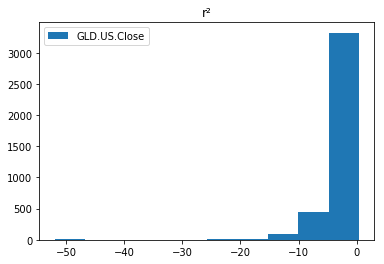

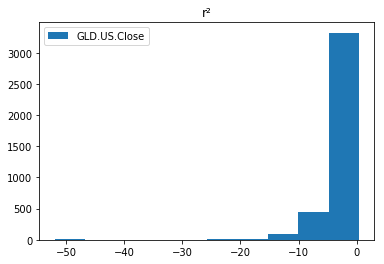

In [10]:

model = Sequential(name="LSTM-Model-1")
model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-1",
               batch_input_shape=model_data.batch_feature_shape,
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=True))

model.add(LSTM(model_data.batch_label_shape[-1] * 2,
               name="LSTM-Layer-2",
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=True))

model.add(LSTM(model_data.batch_label_shape[-1],
               name="LSTM-Layer-3",
               activation='tanh',
               dropout=0,
               recurrent_dropout=0,
               stateful=True,
               return_sequences=model_data.return_sequences))

model.compile("Adam", loss="mse", metrics=['mae', 'acc'])

train_args = {"epochs": 1,
              "use_multiprocessing": True,
              "workers": 4,
              "shuffle": False,
              "verbose": 1}

fit = model_data.fit(model, train_args, frequency=10, relative_accuracy_function=r_square, log_dir="/tmp/foo.123/")
fit["back_test"].plot_hist()

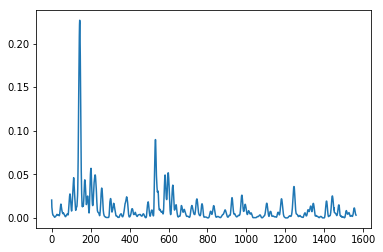

In [11]:
# fit["batch_hist"]["acc"].plot()
fit["batch_hist"]["loss"].plot()

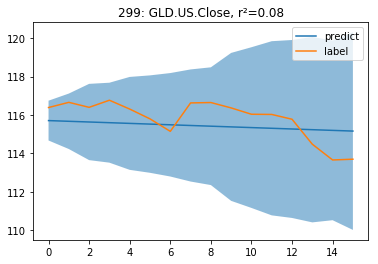

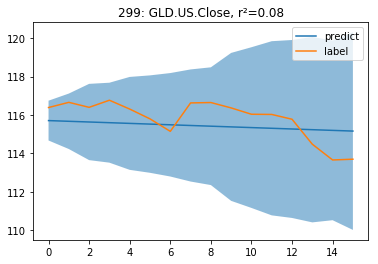

In [7]:
fit["back_test"].plot_random_sample()


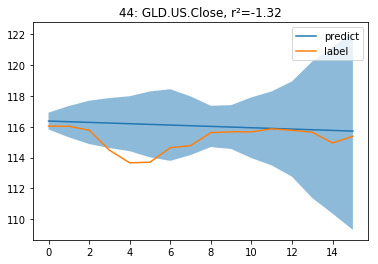

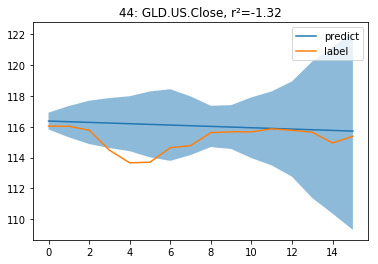

In [17]:
backtest.plot_random_sample()
# backtest.plot_hist()